Tutorial
https://www.kaggle.com/roshansharma/online-shopper-s-intention

DataSet
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Quellen:
1. C. Okan Sakar: 
<br>Department of Computer Engineering, Faculty of Engineering and Natural Sciences, Bahcesehir University, 34349 Besiktas, Istanbul, Turkey

2. Yomi Kastro: 
<br>Inveon Information Technologies Consultancy and Trade, 34335 Istanbul, Turkey

## Ausarbeitung angewandte Programmierung
###### Author: Michael Schwabe
###### Matrikelnummer: 519054
###### Modul: angewandte Programmierung
###### Dozent: Phillip Koch

### Thema: eCommerce Datenanalyse

#### Inhalt
    1. Data
    1.1 DataExploration/ExplainFeatures
        1.1.1 DataSetInfo
        1.1.2 DataSetDescribe
        1.1.3 DataSetProfiling
        1.1.3 DataSetPairPlot
    1.2 Exploration (NULL)
    1.3 Exploration (Classes)
    1.4 Exploration and Preparation (Visualisation)
    1.4.1 DataPreparation and Transformation
    1.4.2 Exploration and HypothesenChecks (Visualisation)
    2. Classification
    2.1 Preparation
    2.1.1 CleanDataFrame
    2.1.2 Split des Datensatzes
    2.2 Modellselection
    2.3 Measure and Fit Standard Models
    2.3.1 Multilayer ROC-Curve
    3. Optimized-Classificaton
    3.1 CrossValidation 
    3.2 KFold
    3.3 RandomSearch+CrossValidation
    3.3.1 BestScoredModel
    3.3.2 ScoredModelList
    3.3.3 Sorted ScoredModelList
    3.3.4 Visualitation
    3.4 ModelExplanation
    3.4.1 Important Features
    4. Clustering
    4.1 Feature Selection
    4.2 Train and Visualisation
    9. TEST SECTION

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import time
import datetime
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# 1.1 DataExploration

In [2]:
%%time
df = pd.read_csv("data/eCommerce/online_shoppers_intention.csv")

Wall time: 62.5 ms


In [3]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

**"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related"** und **"Product Related Duration"** stellen die Anzahl der verschiedenen Arten von Seiten dar, die der Besucher in dieser Sitzung besucht hat, sowie die Gesamtzeit, die in jeder dieser Seitenkategorien verbracht wurde. Die Werte dieser Funktionen werden aus den URL-Informationen der vom Benutzer besuchten Seiten abgeleitet und in Echtzeit aktualisiert, wenn ein Benutzer eine Aktion ausführt, z.B. von einer Seite zur anderen.

---
<table>
  <thead>
    <tr>
      <th>Typ</th>
      <th>URL (Beispiel)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Administrative</td>
      <td>/?login</td>
    </tr>
    <tr>
      <td>Administrative</td>
      <td>/?logout</td>
    </tr> 
    <tr>
      <td>Administrative</td>
      <td>/LoginRegister</td>
    </tr>
    <tr>
      <td>Administrative</td>
      <td>/passwordrecovery</td>
    </tr>
    <tr>
      <td>....</td>
      <td>....</td>
    </tr>
     <tr>
      <td>Product Related</td>
      <td>/</td>
    </tr>
    <tr>
      <td>Product Related</td>
      <td>/search</td>
    </tr>
    <tr>
      <td>Product Related</td>
      <td>/cart</td>
    </tr>
    <tr>
      <td>....</td>
      <td>....</td>
    </tr>
    <tr>
      <td>Informational</td>
      <td>/stores</td>
    </tr>
    <tr>
      <td>Informational</td>
      <td>/Catalog</td>
    </tr>
      <tr>
      <td>....</td>
      <td>....</td>
    </tr>
  </tbody>
</table>

---

Die Funktionen **"Bounce Rate", "Exit Rate" und "Page Value"** stellen die von "Google Analytics" gemessenen Kennzahlen für jede Seite der E-Commerce-Site dar. 

* Der Wert der Funktion **"Bounce Rate"** für eine Webseite bezieht sich auf den Prozentsatz der Besucher, die die Webseite von dieser Seite aus betreten und dann verlassen ("Bounce"), ohne während dieser Sitzung weitere Anfragen an den Analyseserver zu richten. 

* Der Wert der Funktion **"Exit Rate"** für eine bestimmte Webseite wird wie bei allen Seitenaufrufen auf der Seite berechnet, der Prozentsatz, der der letzte in der Sitzung war. 

* Die Funktion **"Page Value"** stellt den Durchschnittswert für eine Webseite dar, die ein Benutzer vor Abschluss einer E-Commerce-Transaktion besucht hat. 

Die Funktion **"Special Day"** zeigt die Nähe der Besuchszeit der Website zu einem bestimmten speziellen Tag (z.B. Muttertag, Valentinstag) an, an dem die Sitzungen eher mit der Transaktion abgeschlossen werden. Der Wert dieses Attributs wird unter Berücksichtigung der Dynamik des E-Commerce bestimmt, wie z.B. der Dauer zwischen Bestelldatum und Liefertermin. Zum Beispiel nimmt dieser Wert für den Valentinstag zwischen dem 2. und 12. Februar einen Wert ungleich Null an, Null vor und nach diesem Datum, es sei denn, er liegt nahe an einem anderen besonderen Tag, und seinen Höchstwert von 1 am 8. Februar. Der Datensatz enthält auch Betriebssystem, Browser, Region, Verkehrstyp, Besuchertyp als wiederkehrender oder neuer Besucher, einen booleschen Wert, der angibt, ob das Datum des Besuchs das Wochenende ist, und den Monat des Jahres.

**"TrafficType"** ist der Typ über den die Besucher auf die Website gekommen sind (z.B. Banner, SMS, direkt).

**"Month"**,**"VisitorType"** selbstsprechender kategorischer diskreter Wert.

**"OperatingSystems"**, **"Browser"**, **"Region"** kategorische, numerische Einteilung

**"Revenue"**, **"Weekend"** boolsche Werte und sind selbstsprechend. Umsatz entstanden und am Wochenende True oder False



---

## Zusammenfassung:
#### Konfig und Administrative Inhalte (PW,UserName etc.)
* Administrative (int)
* Administrative Duration (float)

#### Allgemeine informative Inhalte
* Informational (int)
* Informational Duration (float)

#### Produkt basierte/zugehörige Inhalte
* Product Related (int)
* Product Related Duration (float)

#### GoogleAnalytics Metriken
* Bounce Rate (float)
* Exit Rate   (float)
* Page Value  (float)
* Special Day (float)
* VisitorType (kategorisch [0-9])
* TrafficType (kategorisch [0-9])
* ....

#### Labels
* Revenue (Umsatz J/N)
* Weekend (J/N)



### 1.1.1 Exploration (DataSet-Info)
Die entsprechenden Features mit ihren Datentypen aufgezeigt.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### 1.1.2 Exploration (DataSet-Describe)
Erster einblick. Anzahl, Mittelwert, Standardabweichung, Quantile (0.25, 0.5, 0.75) sowie min und max

In [5]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

### 1.1.3 Exploration (DataSet-Profiling)

Das Profiling dient der generalisierten und standardisierten Betrachtung eines Datensatzes. Das Framework/Modul ermöglicht eine repräsentation die entsprechend gescrollt werden kann um einen ersten Einblick in den Datensatz zu erhalten.

***!!Achtung einige Werte sind "kategorische" Werte bzw. verstecken sich hinter integer Werten auch kategorische Interpretationen!!***

Diese Form dient der ersten Anschauung und bedarf einer tiefgreifenden Analyse im folgenden.

In [6]:
%%time
pandas_profiling.ProfileReport(df)

C:\Users\micha\Anaconda3\envs\DataScience1\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Wall time: 5.64 s


### 1.1.4 Exploration (DataSet-Pairplot)

Der Pairplot ermöglicht eine Repräsentation der Verteilung auf und mit jedem Attribut. Das ist sofern von Nutzen da sich hier auch entsprechende Dopplungen bzw. Abhängigkeiten heraus kristalisieren. Diese bedarf es natürlich durch eine Korrelationsanalyse zu ermitteln und bei bedarf (was meistens der Fall ist) entfernen. 
Auffäligkeiten (auf den ersten Blick):
* **BounceRate** und **ExitRate**
* **SpecialDay** und **Region**
* ...

**Sollten weiter untersucht werden**

***TypeObject kann nicht geplottet ... hier das entfernen aller Object Typen nötig***

In [7]:
sns.set(style="ticks", color_codes=True)
testdf = df.drop(columns = ['VisitorType','Weekend','Revenue','Month'])
#testdf = df.drop(columns = ['VisitorType','Weekend','Revenue'])
#testdf = df.drop(columns = ['Weekend','Revenue','Month'])

#g = sns.pairplot(testdf)
#g = sns.pairplot(testdf)

#fig = g.get_figure()
#fig.savefig("pairplot.png")


Wall time: 10.4 s


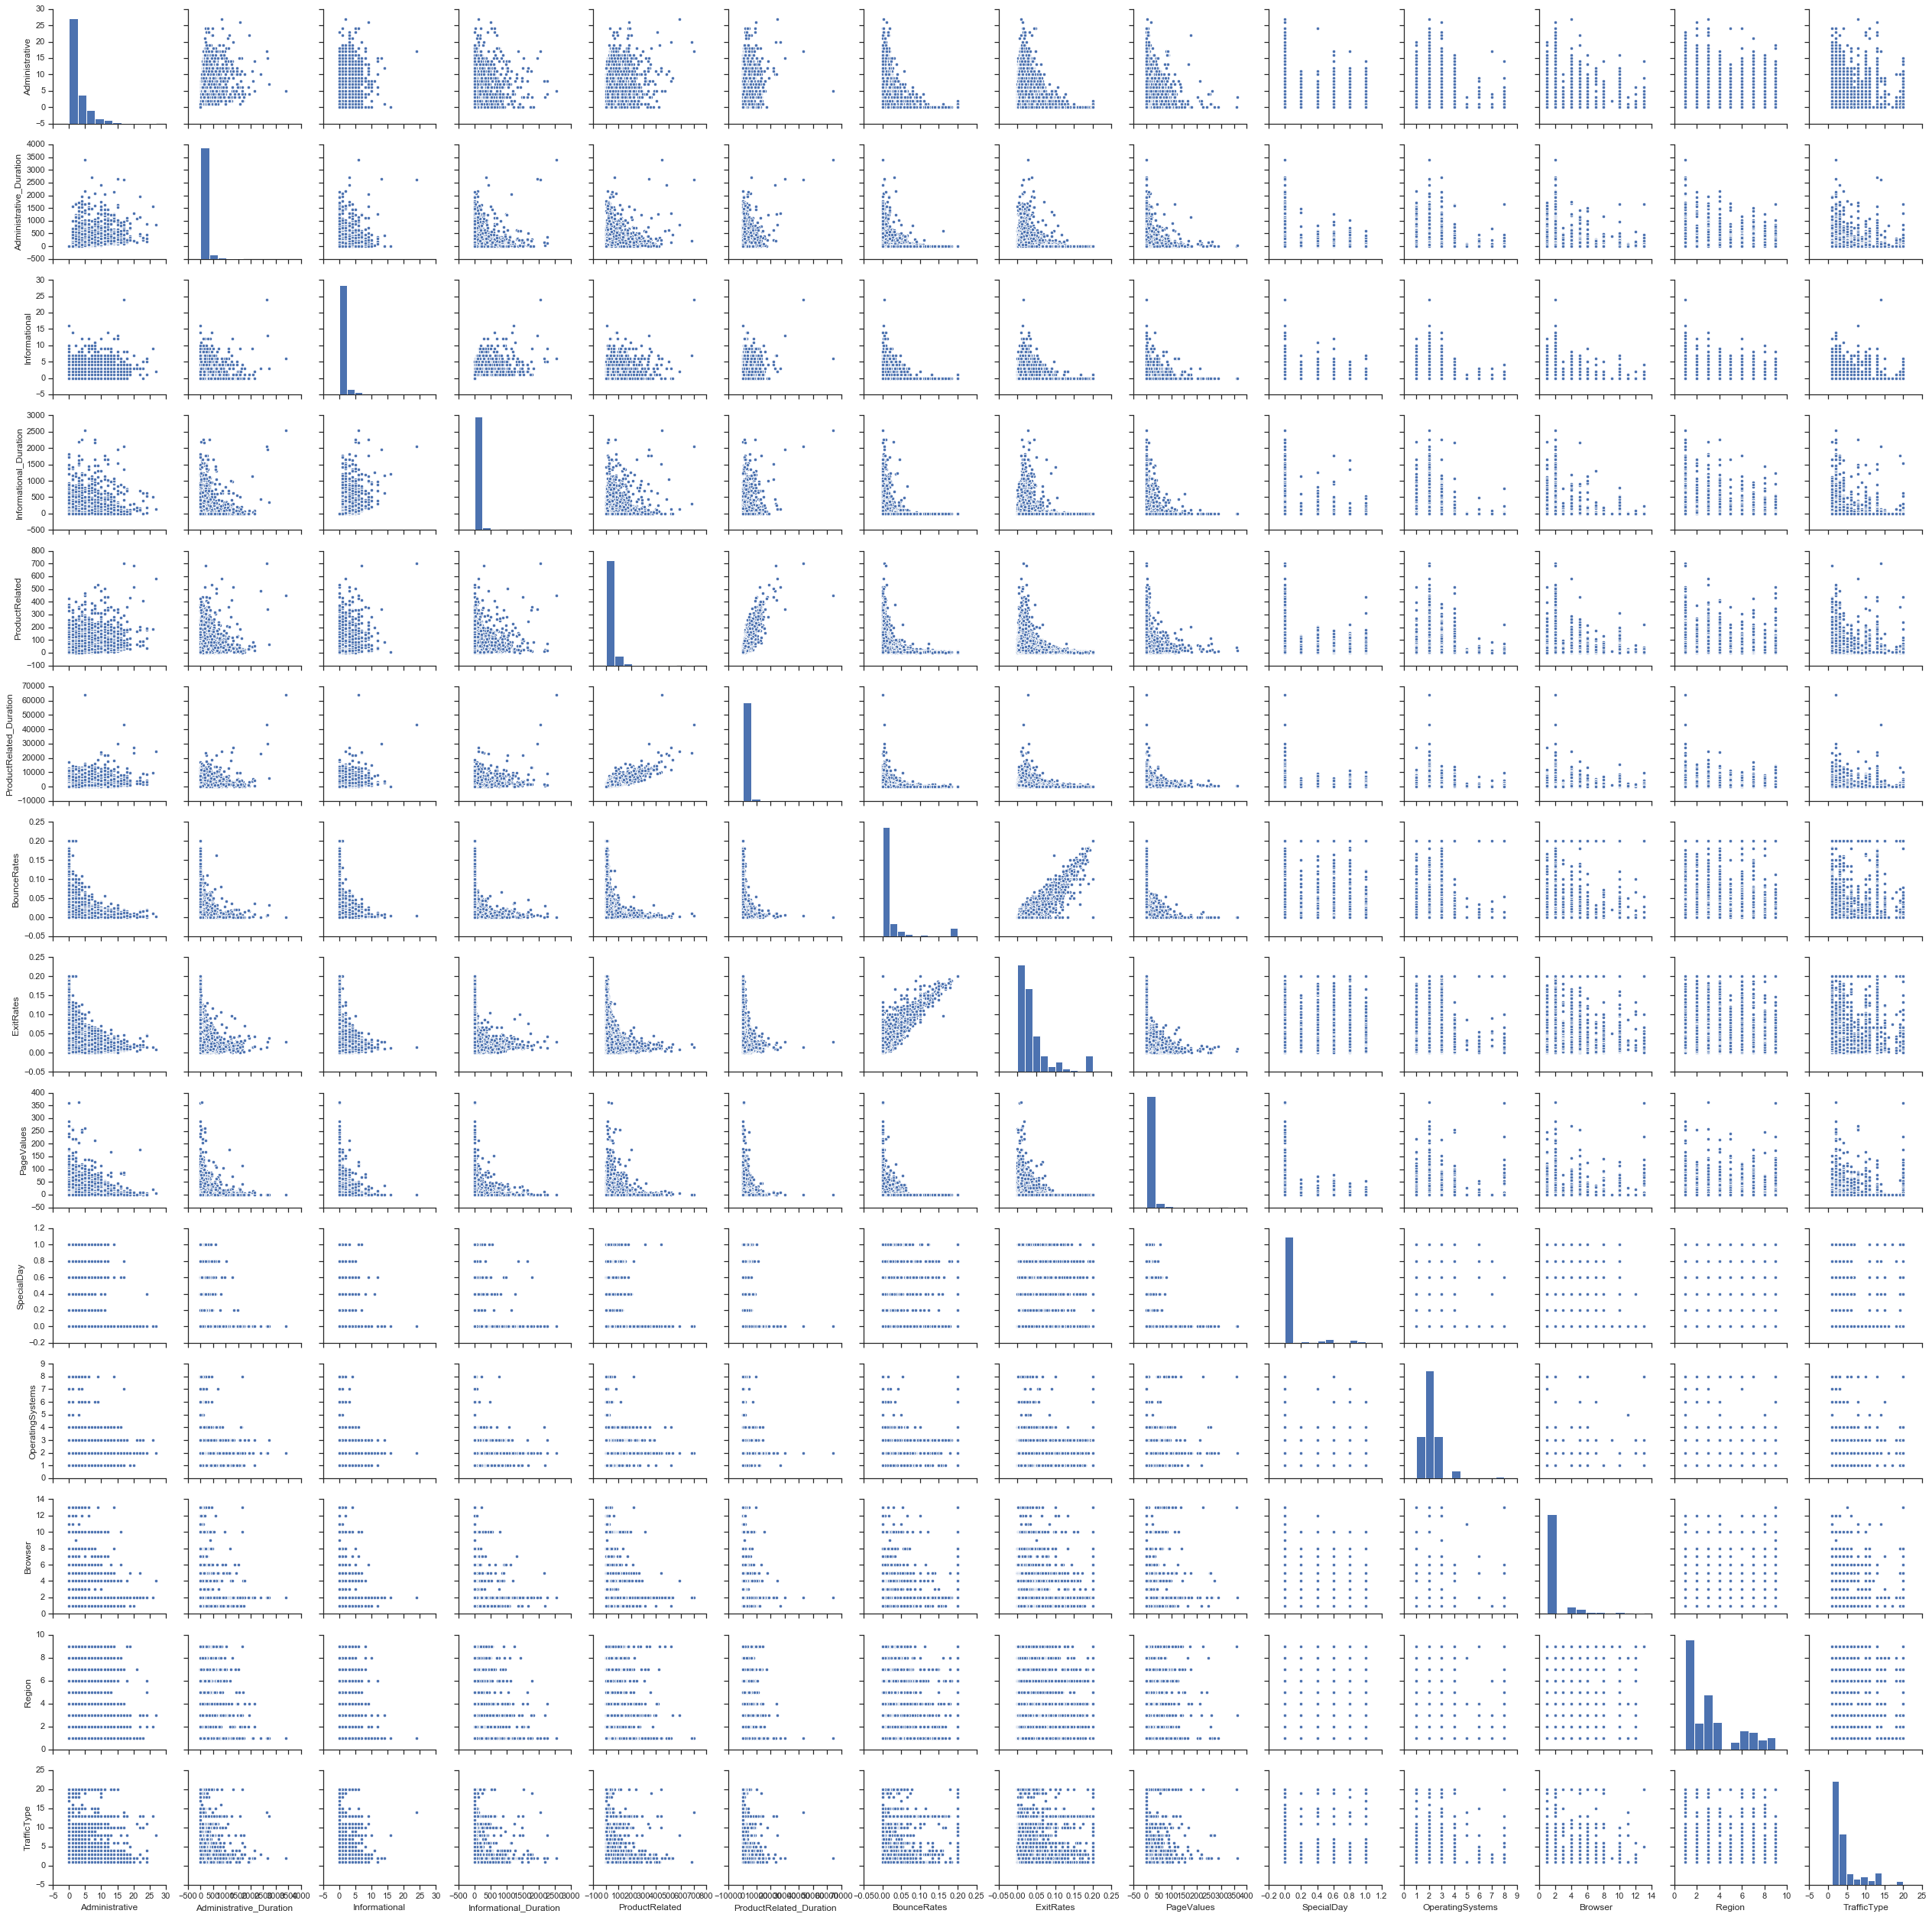

In [8]:
%%time
g = sns.pairplot(testdf)


In [9]:
%%time
g.savefig("pairplot.png")

Wall time: 17.5 s


### 1.2 Exploration (NULL)

In [10]:
%%time
df.isnull().sum().sum()

Wall time: 2.99 ms


0

### 1.3 Exploration (Classes)
#### über ggf. Klassen nach den ich Klassifizieren will (! Achtung >2 = Mehrklassenproblem)

In [128]:
%%time
df['Revenue'].value_counts()

Wall time: 997 µs


0    10422
1     1908
Name: Revenue, dtype: int64

### 1.4 Exploration (Visualisation)

In [12]:
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

#### univariate analyse der Daten ... Verteilung Umsatz J/N und am Wochende käufe J/N


colorMaps
* Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

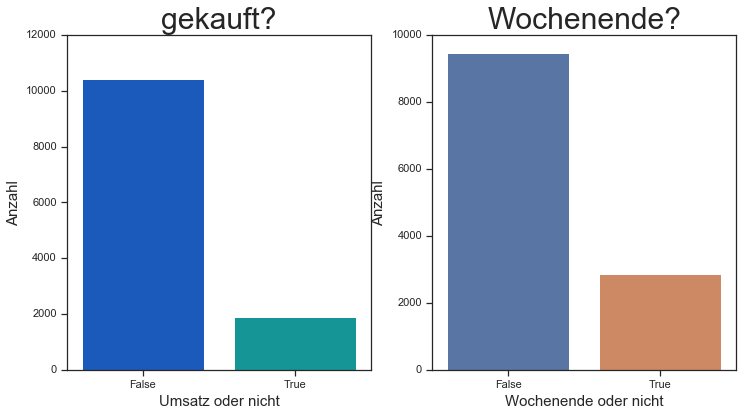

In [13]:
# Verteilung Umsatz J/N und am Wochende käufe J/N
plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'winter')#CMRmap')#'bright')
plt.title('gekauft?', fontsize = 30)
plt.xlabel('Umsatz oder nicht', fontsize = 15)
plt.ylabel('Anzahl', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'deep')
plt.title('Wochenende?', fontsize = 30)
plt.xlabel('Wochenende oder nicht', fontsize = 15)
plt.ylabel('Anzahl', fontsize = 15)

plt.show()

# Hypothese 1

<table>
  <thead>
    <tr>
      <th style="text-align: center">Nr.</th>
      <th style="text-align: center">0-Hypothese</th>
      <th style="text-align: center">A-Hypothese</th>
      <th style="text-align: right">Annahme / Verfahren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">1</td>
      <td style="text-align: left">Der Umsatz hängt vom Wochenende ab</td>
      <td style="text-align: left">Der Umsatz hängt nicht vom Wochenende ab</td>
      <td style="text-align: right">H1 angenommen / Korrelationskoeffizient</td>
    </tr>
  </tbody>
</table>


In [14]:
import numpy
print("Korrelationskoeffizient zwischen Weekend und Umsatz (Revenue): "+str(numpy.corrcoef(df['Weekend'], df['Revenue'])[0, 1]))
print("Gesamtlänge des DataFrames: "+str(len(df)))
print("################## Weekend ######################")
print(df['Weekend'].value_counts())
falsevalue_pct = round(9462/len(df),4)
print("Verhältnis False: "+str(falsevalue_pct))
truevalue_pct = round(1-falsevalue_pct,4)
print("Verhältnis True: "+str(truevalue_pct))
    
print("################## Revenue/Umsatz ######################")
print(df['Revenue'].value_counts())
falsevalue_pct = round(10422/len(df),4)
print("Verhältnis False: "+str(falsevalue_pct))
truevalue_pct = round(1-falsevalue_pct,4)
print("Verhältnis True: "+str(truevalue_pct))


Korrelationskoeffizient zwischen Weekend und Umsatz (Revenue): 0.02929536797199438
Gesamtlänge des DataFrames: 12330
################## Weekend ######################
False    9462
True     2868
Name: Weekend, dtype: int64
Verhältnis False: 0.7674
Verhältnis True: 0.2326
################## Revenue/Umsatz ######################
False    10422
True      1908
Name: Revenue, dtype: int64
Verhältnis False: 0.8453
Verhältnis True: 0.1547


#### Verteilung der unterschiedlichen Besucher und der unterschiedlichen Browser

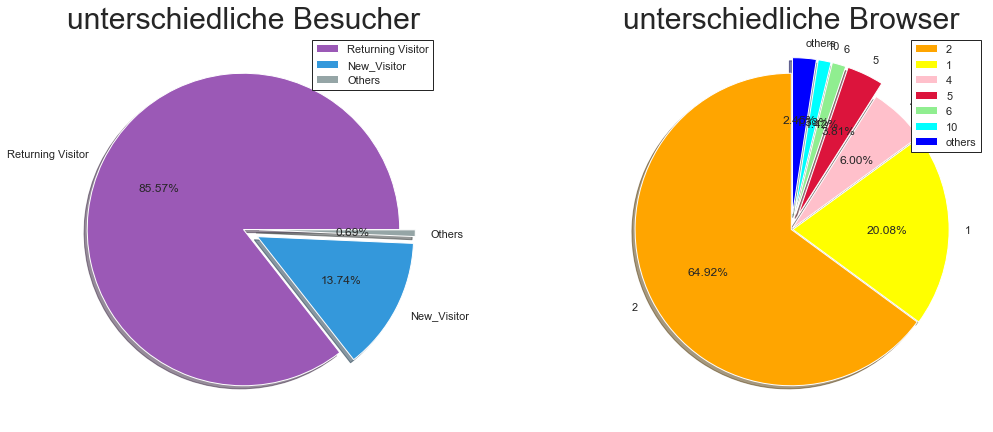

In [15]:
# Kuchendiegramme

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ["#9b59b6", "#3498db", "#95a5a6"]
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0.1, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('unterschiedliche Besucher', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.01,0.01,0.1,0.1,0.1, 0.1]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode,shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('unterschiedliche Browser', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()


## 1.4.1 DataPreparation and Transformation

## Idee, die kategorischen Werte/Features für Browser und OS zusammenzufassen. Folgende aufteilung würde laut statista Sinn ergeben.

### Quelle Statista:
<table>
  <thead>
    <tr>
      <th>OS Nutzung Weltweit</th>
      <th>Browser Nutzung Weltweit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><img src="data/pics/OS Benutzung.png" alt="Betriebssystemnutzung" title="" /></td>
      <td><img src="data/pics/Browsernutzung.png" alt="Browsernutzung" title="" /></td>
    </tr>
  </tbody>
</table>


## VS:
* Label 3 - 10551 (Returning Visitors)
* Label 1 - 1694 (New Visitors)
* Label 2 - 85 (Others)


## OS:
* Label 2 - 6601 (Win)
* Label 1 - 2585 (MacOS)
* Label 3 - 3144 (Linux & Others)

## BW:
* Label 2 - 7961 (Chrome)
* Label 1 - 2462 (Firefox)
* Label 3 - 736 (IE & Edge)
* Label 5 - 704 (Safari)
* Label 4 - 467 (Opera)


In [16]:
df.replace({'VisitorType': 'New_Visitor'},value=1, inplace=True)
df.replace({'VisitorType': 'Other'},value=2, inplace=True)
df.replace({'VisitorType': 'Returning_Visitor'},value=3, inplace=True)
VSlist = df['VisitorType'].value_counts()
VSlist.sort_values(ascending=False, inplace=True, kind='quicksort')
VSlist

3    10551
1     1694
2       85
Name: VisitorType, dtype: int64

In [17]:
#print(df['OperatingSystems'].value_counts())
#print(df['Browser'].value_counts())
OSlist = df['OperatingSystems'].value_counts()
OSlist.sort_values(ascending=False, inplace=True, kind='quicksort')
OSlist

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [18]:
df.replace({'OperatingSystems': 5},value=4, inplace=True)
df.replace({'OperatingSystems': 7},value=4, inplace=True)
df.replace({'OperatingSystems': 6},value=4, inplace=True)
df.replace({'OperatingSystems': 8},value=4, inplace=True)
df.replace({'OperatingSystems': 4},value=3, inplace=True)


In [19]:
OSlist = df['OperatingSystems'].value_counts()
OSlist.sort_values(ascending=False, inplace=True, kind='quicksort')
OSlist

2    6601
3    3144
1    2585
Name: OperatingSystems, dtype: int64

In [20]:
BWlist = df['Browser'].value_counts()
BWlist.sort_values(ascending=False, inplace=True, kind='quicksort')
BWlist

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [21]:
df.replace({'Browser': 9},value=6, inplace=True)
df.replace({'Browser': 11},value=6, inplace=True)
df.replace({'Browser': 12},value=6, inplace=True)
df.replace({'Browser': 7},value=6, inplace=True)
df.replace({'Browser': 13},value=6, inplace=True)
df.replace({'Browser': 3},value=6, inplace=True)
df.replace({'Browser': 8},value=6, inplace=True)
df.replace({'Browser': 10},value=6, inplace=True)
df.replace({'Browser': 4},value=3, inplace=True)
df.replace({'Browser': 5},value=4, inplace=True)
df.replace({'Browser': 6},value=5, inplace=True)


In [22]:
BWlist = df['Browser'].value_counts()
BWlist.sort_values(ascending=False, inplace=True, kind='quicksort')
BWlist

2    7961
1    2462
3     736
5     704
4     467
Name: Browser, dtype: int64

In [23]:
OSlist

2    6601
3    3144
1    2585
Name: OperatingSystems, dtype: int64

# 1.4.2 Exploration and HypothesenChecks (Visualisation)

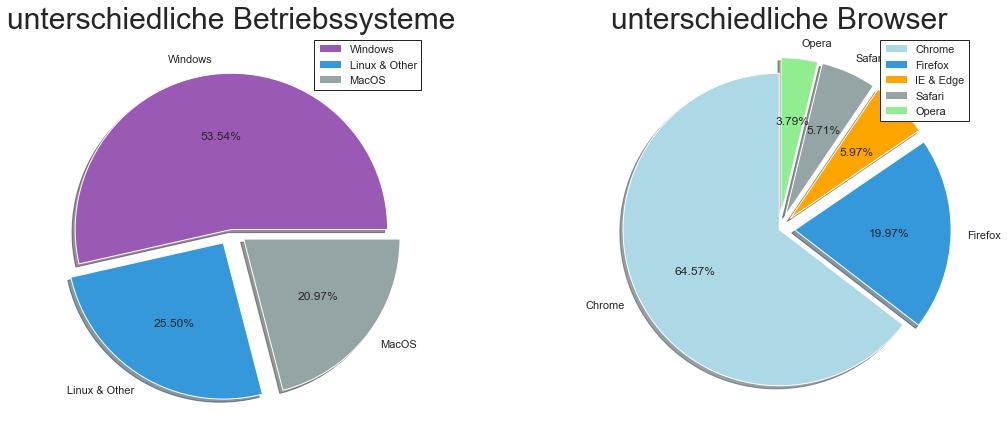

In [24]:
# Kuchendiegramme
plt.rcParams['figure.figsize'] = (18, 7)
size = OSlist
colors = ["#9b59b6", "#3498db", "#95a5a6"]
labels = "Windows", "Linux & Other", "MacOS"
explode = [0, 0.1, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('unterschiedliche Betriebssysteme', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = BWlist
colors = ['lightblue', '#3498db', 'orange', '#95a5a6', 'lightgreen']
labels = "Chrome", "Firefox","IE & Edge","Safari","Opera"
explode = [0, 0.1,0.1,0.1,0.1]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode,shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('unterschiedliche Browser', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

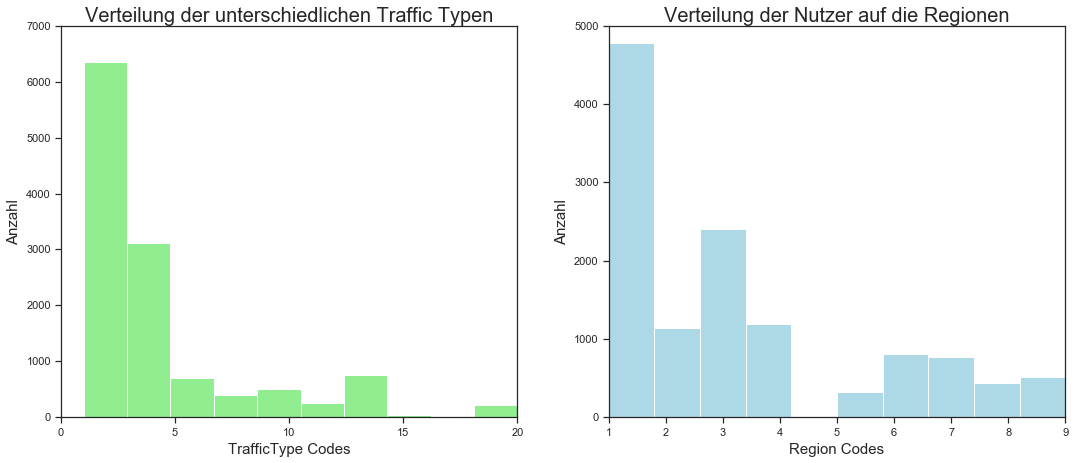

In [25]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightgreen')
plt.title('Verteilung der unterschiedlichen Traffic Typen',fontsize = 20)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Anzahl', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(df['Region'], color = 'lightblue')
plt.title('Verteilung der Nutzer auf die Regionen',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Anzahl', fontsize = 15)

plt.show()

In [26]:
# checking the no. of OSes each user is having
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [27]:
# checking the no. of OSes each user is having
df['OperatingSystems'].value_counts()

2    6601
3    3144
1    2585
Name: OperatingSystems, dtype: int64

In [28]:
#checking the months with most no.of customers visiting the online shopping sites
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

## Attribut Gegenüberstellungen. Spezielle Betrachtung liegt auf dem Umsatz.


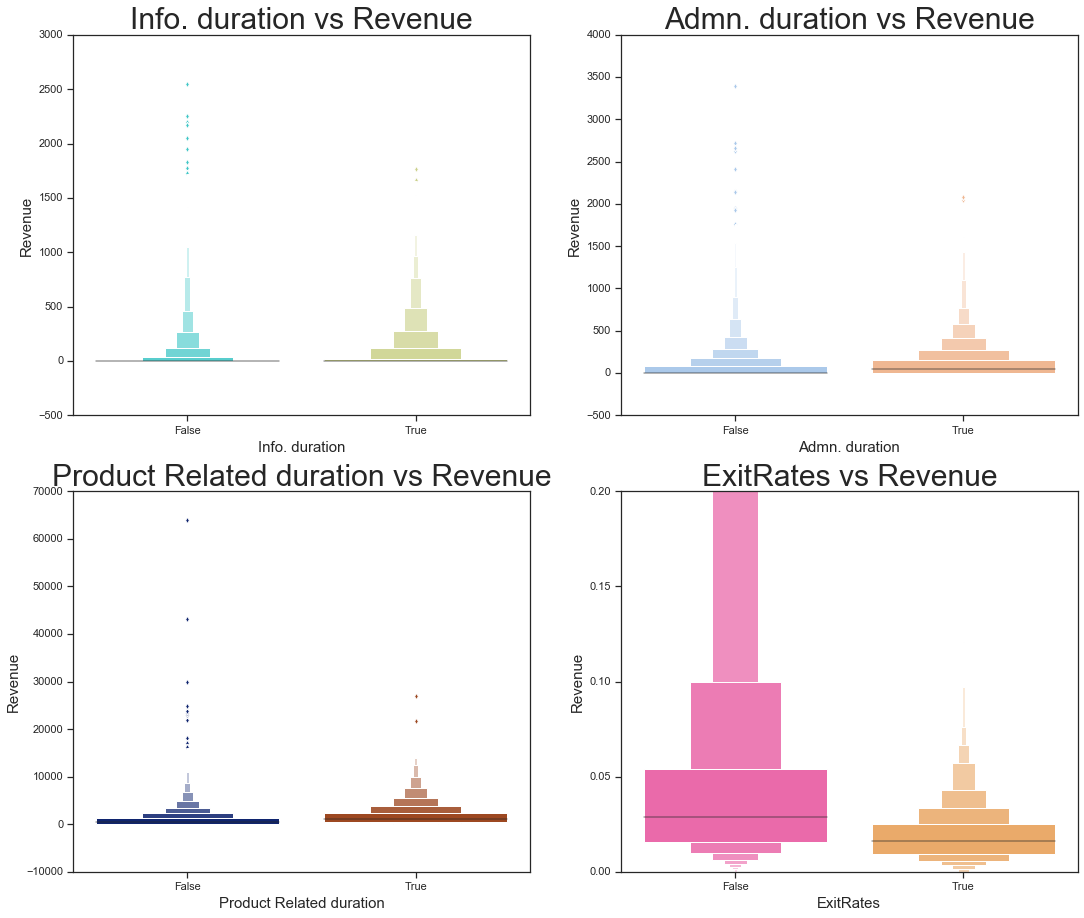

In [29]:
# product related duration vs revenue
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue
plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue
plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue
plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()

# Hypothesen 2-5
<table>
  <thead>
    <tr>
      <th style="text-align: center">Nr.</th>
      <th style="text-align: center">0-Hypothese</th>
      <th style="text-align: center">A-Hypothese</th>
      <th style="text-align: right">Annahme / Verfahren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">2</td>
      <td style="text-align: left">Der Aufenthalt (Dauer) im Kontext der allgemeinen Informationssektionen hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Der Aufenthalt (Dauer) im Kontext der allgemeinen Informationssektionen hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
    <tr>
      <td style="text-align: center">3</td>
      <td style="text-align: left">Der Aufenthalt (Dauer) im Kontext der Adminitrationssektion hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Der Aufenthalt (Dauer) im Kontext der Adminitrationssektion hat eine Auswirkung auf bzw. Zusammenhang den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
    <tr>
      <td style="text-align: center">4</td>
      <td style="text-align: left">Der Aufenthalt (Dauer) im Kontext der Produktsektionen hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Der Aufenthalt (Dauer) im Kontext der Produktsektionen hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
    <tr>
      <td style="text-align: center">5</td>
      <td style="text-align: left">Das Verlassen der Seite hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Das Verlassen der Seite hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
  </tbody>
</table>

In [30]:
print("Korrelationskoeffizient zwischen ExitRates und Umsatz (Revenue): "+str(numpy.corrcoef(df['ExitRates'], df['Revenue'])[0, 1]))
print("Korrelationskoeffizient zwischen ProductRelated_Duration und Umsatz (Revenue): "+str(numpy.corrcoef(df['ProductRelated_Duration'], df['Revenue'])[0, 1]))
print("Korrelationskoeffizient zwischen Administrative_Duration und Umsatz (Revenue): "+str(numpy.corrcoef(df['Administrative_Duration'], df['Revenue'])[0, 1]))
print("Korrelationskoeffizient zwischen Informational_Duration und Umsatz (Revenue): "+str(numpy.corrcoef(df['Informational_Duration'], df['Revenue'])[0, 1]))

Korrelationskoeffizient zwischen ExitRates und Umsatz (Revenue): -0.20707108205527205
Korrelationskoeffizient zwischen ProductRelated_Duration und Umsatz (Revenue): 0.15237261055701043
Korrelationskoeffizient zwischen Administrative_Duration und Umsatz (Revenue): 0.09358671905704201
Korrelationskoeffizient zwischen Informational_Duration und Umsatz (Revenue): 0.0703445023459834


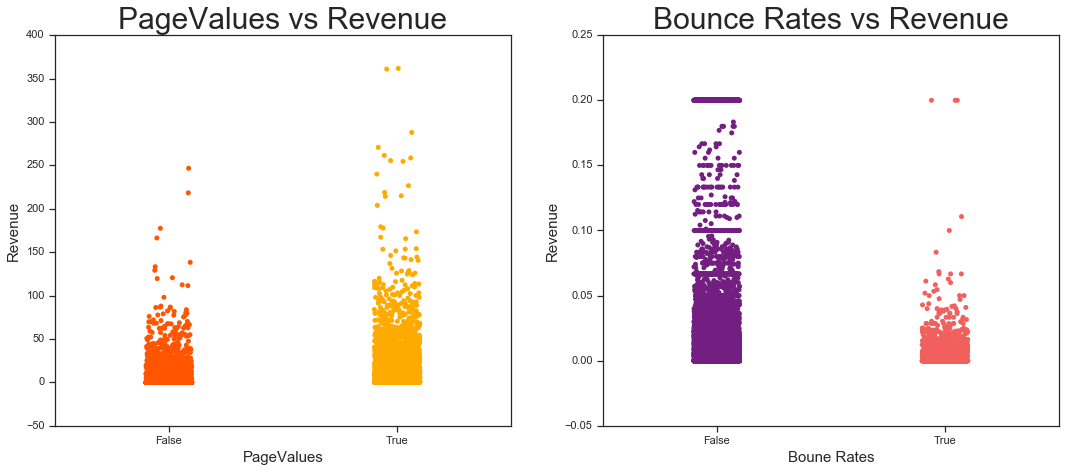

In [31]:
#page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

# Hypothesen 6-7

* Die Funktion **"Page Value"** stellt den Durchschnittswert für eine Webseite dar, die ein Benutzer vor Abschluss einer E-Commerce-Transaktion besucht hat.
* Der Wert der Funktion **"Bounce Rate"** für eine Webseite bezieht sich auf den Prozentsatz der Besucher, die die Webseite von dieser Seite aus betreten und dann verlassen ("Bounce"), ohne während dieser Sitzung weitere Anfragen an den Analyseserver zu richten. 


<table>
  <thead>
    <tr>
      <th style="text-align: center">Nr.</th>
      <th style="text-align: center">0-Hypothese</th>
      <th style="text-align: center">A-Hypothese</th>
      <th style="text-align: right">Annahme / Verfahren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">6</td>
      <td style="text-align: left">Der PageValue hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Der PageValue hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
    <tr>
      <td style="text-align: center">7</td>
      <td style="text-align: left">Die BounceRate hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Die BounceRate hat eine Auswirkung auf bzw. Zusammenhang den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
  </tbody>
</table>

In [32]:
print("Korrelationskoeffizient zwischen PageValue und Umsatz (Revenue): "+str(numpy.corrcoef(df['PageValues'], df['Revenue'])[0, 1]))
print("Korrelationskoeffizient zwischen BounceRate und Umsatz (Revenue): "+str(numpy.corrcoef(df['BounceRates'], df['Revenue'])[0, 1]))


Korrelationskoeffizient zwischen PageValue und Umsatz (Revenue): 0.49256929525120763
Korrelationskoeffizient zwischen BounceRate und Umsatz (Revenue): -0.15067291192605398


## Kreuztabelle erstellt und als Diagramm ausgegeben

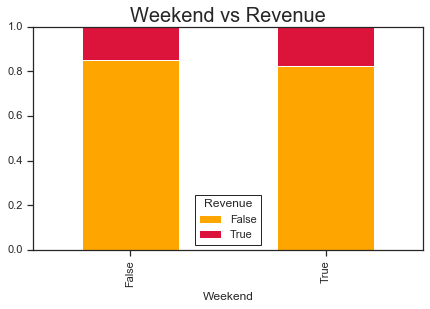

In [33]:
# weekend vs Revenue
df_data = pd.crosstab(df['Weekend'], df['Revenue'])
df_data.div(df_data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 4), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 20)
plt.show()


In [34]:
df_data

Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499

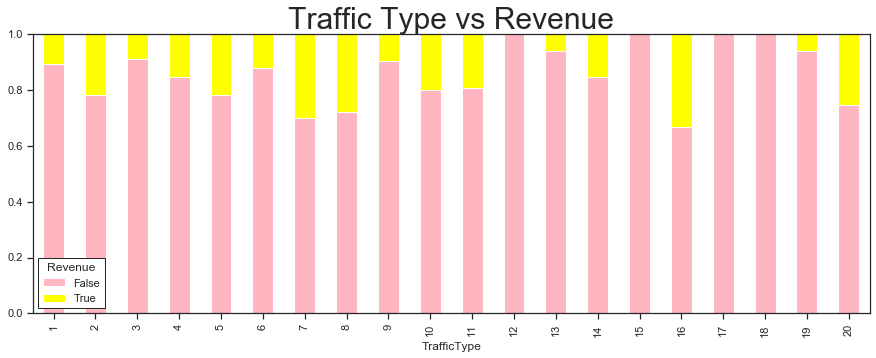

In [35]:
# Traffic Type vs Revenue
df_data = pd.crosstab(df['TrafficType'], df['Revenue'])
df_data.div(df_data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()


In [36]:
df_data

Revenue      False  True 
TrafficType              
1             2189    262
2             3066    847
3             1872    180
4              904    165
5              204     56
6              391     53
7               28     12
8              248     95
9               38      4
10             360     90
11             200     47
12               1      0
13             695     43
14              11      2
15              38      0
16               2      1
17               1      0
18              10      0
19              16      1
20             148     50

# Hypothesen 8

* **"TrafficType"** ist der Typ über den die Besucher auf die Website gekommen sind (z.B. Banner, SMS, direkt).


<table>
  <thead>
    <tr>
      <th style="text-align: center">Nr.</th>
      <th style="text-align: center">0-Hypothese</th>
      <th style="text-align: center">A-Hypothese</th>
      <th style="text-align: right">Annahme / Verfahren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">8</td>
      <td style="text-align: left">Der TrafficType hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Der TrafficType hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
  </tbody>
</table>

In [37]:
print("Korrelationskoeffizient zwischen TrafficType und Umsatz (Revenue): "+str(numpy.corrcoef(df['TrafficType'], df['Revenue'])[0, 1]))
import scipy
scipy.stats.spearmanr(df['TrafficType'],df['Revenue'])

Korrelationskoeffizient zwischen TrafficType und Umsatz (Revenue): -0.005112970502755556


SpearmanrResult(correlation=-0.0011891693746148063, pvalue=0.8949584583439678)

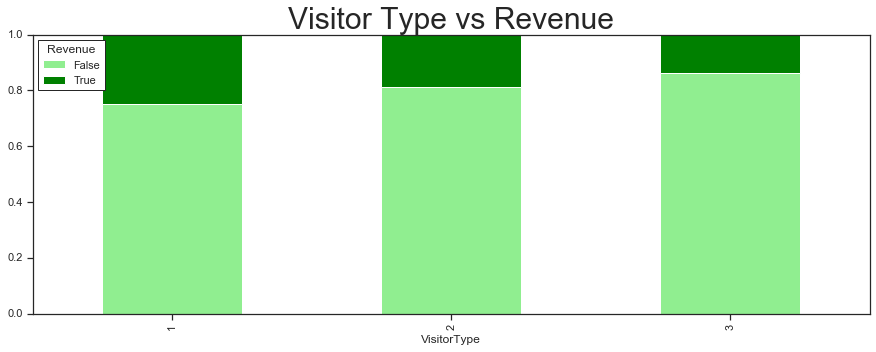

In [38]:
# visitor type vs revenue
df_data = pd.crosstab(df['VisitorType'], df['Revenue'])
df_data.div(df_data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

# Hypothesen 9

* **"VisitorType"** selbstsprechender kategorischer diskreter Wert. VS:
    * Label 3 Returning_Visitor)
    * Label 1 New_Visitor)
    * Label 2 Other



<table>
  <thead>
    <tr>
      <th style="text-align: center">Nr.</th>
      <th style="text-align: center">0-Hypothese</th>
      <th style="text-align: center">A-Hypothese</th>
      <th style="text-align: right">Annahme / Verfahren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">9</td>
      <td style="text-align: left">Der PageValue hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Der PageValue hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
  </tbody>
</table>

In [39]:
print("Korrelationskoeffizient zwischen PageValue und Umsatz (Revenue): "+str(numpy.corrcoef(df['VisitorType'], df['Revenue'])[0, 1]))
import scipy
scipy.stats.spearmanr(df['VisitorType'],df['Revenue'])

Korrelationskoeffizient zwischen PageValue und Umsatz (Revenue): -0.10472572201866671


SpearmanrResult(correlation=-0.10423887899368257, pvalue=3.878131128342029e-31)

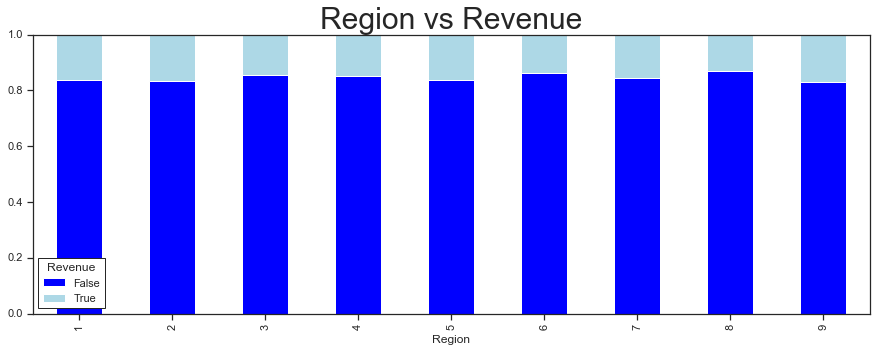

In [40]:
# region vs Revenue
df_data = pd.crosstab(df['Region'], df['Revenue'])
df_data.div(df_data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['blue', 'lightblue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

# Hypothesen 10

* 


<table>
  <thead>
    <tr>
      <th style="text-align: center">Nr.</th>
      <th style="text-align: center">0-Hypothese</th>
      <th style="text-align: center">A-Hypothese</th>
      <th style="text-align: right">Annahme / Verfahren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">10</td>
      <td style="text-align: left">Die Region hat keine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: left">Die Region hat eine Auswirkung bzw. Zusammenhang auf den Umsatz</td>
      <td style="text-align: right">H0 kann nicht abgelehnt werden, Korrelationskoeffizient</td>
    </tr>
  </tbody>
</table>

In [41]:
print("Korrelationskoeffizient zwischen Region und Umsatz (Revenue): "+str(numpy.corrcoef(df['Region'], df['Revenue'])[0, 1]))
import scipy
scipy.stats.spearmanr(df['Region'],df['Revenue'])

Korrelationskoeffizient zwischen Region und Umsatz (Revenue): -0.011595067777800517


SpearmanrResult(correlation=-0.014792282525562174, pvalue=0.10049341182361644)

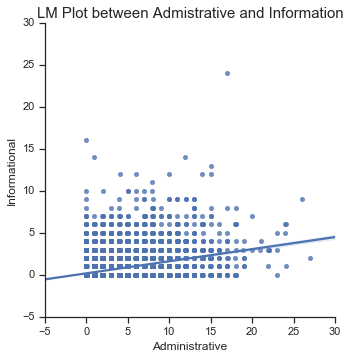

In [42]:
# lm plot
plt.rcParams['figure.figsize'] = (20, 10)
sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)
plt.show()


# Verteilung über die Monate

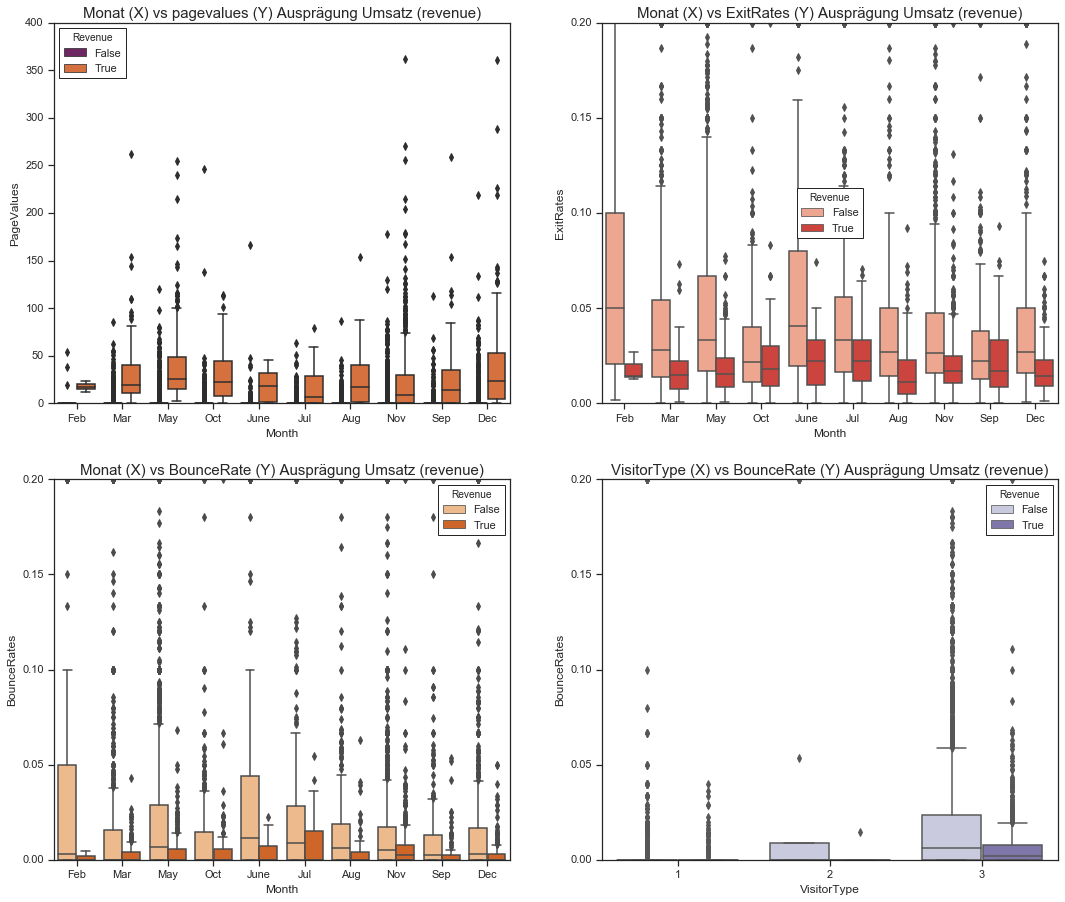

In [43]:
# Monat (X) vs pagevalues (Y) ausprägung Umsatz (revenue)

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Monat (X) vs pagevalues (Y) Ausprägung Umsatz (revenue)', fontsize = 15)

# Monat (X) vs ExitRates (Y) Ausprägung Umsatz (revenue)
plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Monat (X) vs ExitRates (Y) Ausprägung Umsatz (revenue)', fontsize = 15)

# Monat (X) vs BounceRate (Y) Ausprägung Umsatz (revenue)
plt.subplot(2, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Monat (X) vs BounceRate (Y) Ausprägung Umsatz (revenue)', fontsize = 15)

# VisitorType (X) vs BounceRate (Y) Ausprägung Umsatz (revenue)
plt.subplot(2, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('VisitorType (X) vs BounceRate (Y) Ausprägung Umsatz (revenue)', fontsize = 15)

plt.show()

# Verteilung über den BesucherTyp sowie über die Region

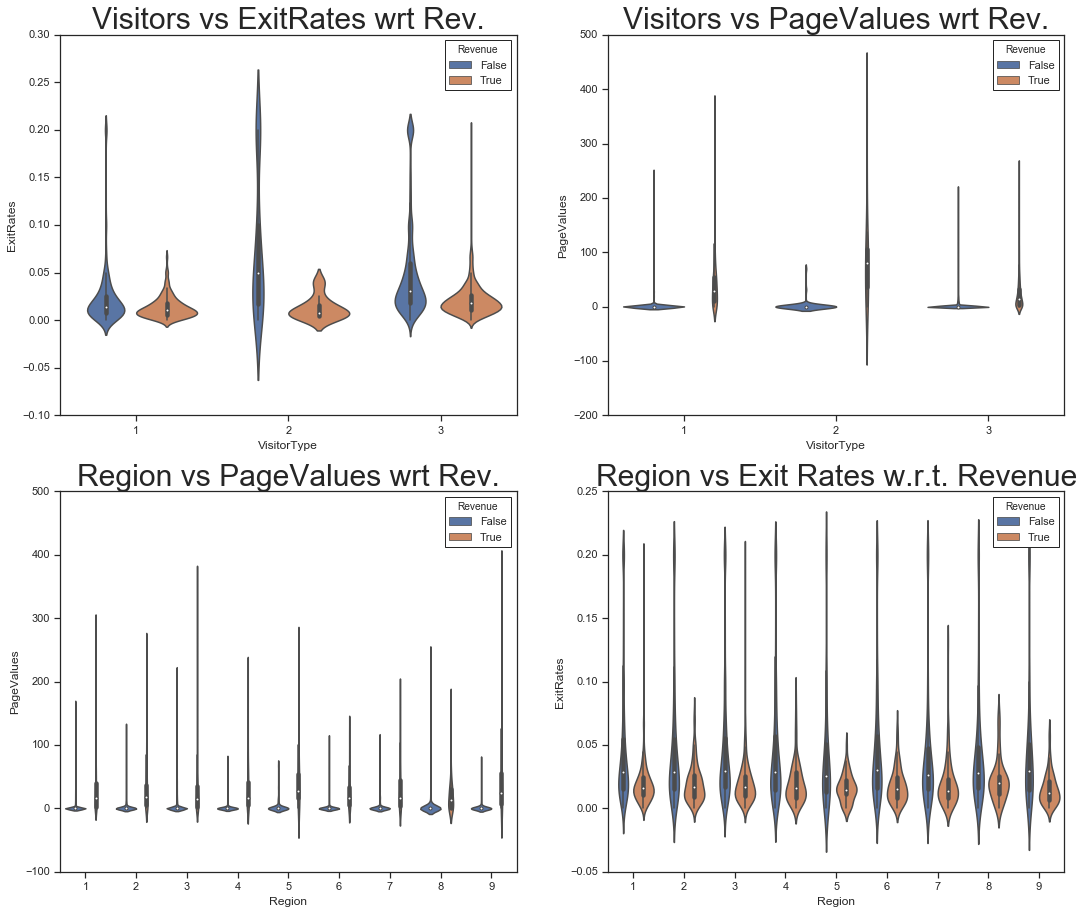

In [44]:
# visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'])#, palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'])#, palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'])#, palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'])#, palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

# 2. KLASSIFIZIERUNG

## 2.1 Präparation
Vorbereitung des Datensatzes für die verwendeten Modelle. Dazu sollten nurnoch numerische Werte im Datensatz vorhanden sein 

Die gesamten Monate bzw. die Monate werden als eigenes Feature abgebildet

In [45]:
# one hot encoding für alle !!!
dfnew = pd.DataFrame(df)
df_data1 = pd.get_dummies(df)
df_data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')

In [46]:
# label encoding für den Umsatz
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfnew['Revenue'] = le.fit_transform(dfnew['Revenue'])
dfnew['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

# 2.1.1 CleanDataFrame

In [47]:
# Abhängige und unabhängige Variablen
x = df_data1

# entfernen meines Targets (Umsatz)
x = x.drop(['Revenue'], axis = 1)

y = dfnew['Revenue']

# Dimensionen checken
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 26)
Shape of y: (12330,)


In [48]:
# OneHotEncoding checken ... soweit okay
x.head(10)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   
7                     0.0               0                 0.000000   
8                     0.0               2                37.000000   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Aug  Month_Dec  \
0     0.200000   0.200000         0.0         0.0  ...          0          0   
1     0.000000   0.100000         0.0         0.0  ...          0          0   
2     0.200000   0.200000         0.0         0.0  ...          0          0   
3     0.050000   0.140000         0.0         0.0  ...          0          0   
4     0.020000   0.050000         0.0         0.0  ...          0          0   
5     0.015789   0.024561         0.0         0.0  ...          0          0   
6     0.200000   0.200000         0.0         0.4  ...          0          0   
7     0.200000   0.200000         0.0         0.0  ...          0          0   
8     0.000000   0.100000         0.0         0.8  ...          0          0   
9     0.000000   0.022222         0.0         0.4  ...          0          0   

   Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  \
0          1          0           0          0          0          0   
1          1          0           0          0          0          0   
2          1          0           0          0          0          0   
3          1          0           0          0          0          0   
4          1          0           0          0          0          0   
5          1          0           0          0          0          0   
6          1          0           0          0          0          0   
7          1          0           0          0          0          0   
8          1          0           0          0          0          0   
9          1          0           0          0          0          0   

   Month_Oct  Month_Sep  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  
5          0          0  
6          0          0  
7          0          0  
8          0          0  
9          0          0  

[10 rows x 26 columns]

## 2.1.2 Split des Datensatzes

Anpassung von x und y im vorgelaggerten Teil nötig

In [49]:
# Split des Datensatzes

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

# Dimensionen überprüfen
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 26)
Shape of y_train : (8631,)
Shape of x_test : (3699, 26)
Shape of y_test : (3699,)


# 2.2 Modellselection
## Models:
(https://scikit-learn.org/stable/modules/ensemble.html)
* **RandomForest**
* **BaggingClassifier**
    * In Ensemble-Algorithmen bilden Bagging-Methoden eine Klasse von Algorithmen, die mehrere Instanzen eines Black-Box-Schätzers auf zufälligen Teilmengen des ursprünglichen Trainingssatzes aufbauen und dann ihre individuellen Vorhersagen zu einer endgültigen Vorhersage aggregieren. Diese Methoden werden verwendet, um die Varianz eines Basisschätzers (z.B. eines Entscheidungsbaums) zu reduzieren, indem man die Randomisierung in seine Konstruktion einführt und dann ein Ensemble daraus macht. In vielen Fällen stellen Bagging-Methoden eine sehr einfache Möglichkeit dar, sich gegenüber einem einzelnen Modell zu verbessern, ohne dass es notwendig ist, den zugrunde liegenden Basisalgorithmus anzupassen. Da sie eine Möglichkeit bieten, Überfittings zu reduzieren, funktionieren Bagging-Methoden am besten mit starken und komplexen Modellen (z.B. voll entwickelte Entscheidungsbäume), im Gegensatz zu Boosting-Methoden, die normalerweise am besten mit schwachen Modellen funktionieren (z.B. flache Entscheidungsbäume).
* **ExtremelyRandomizedTrees (ExtraTreesClassifier)**
    * In extrem randomisierten Bäumen (siehe Klassen ExtraTreesClassifier und ExtraTreesRegressor) geht die Zufälligkeit bei der Berechnung von Splits einen Schritt weiter. Wie in zufälligen Wäldern wird eine zufällige Teilmenge von Kandidatenmerkmalen verwendet, aber anstatt nach den diskriminierendsten Schwellenwerten zu suchen, werden für jedes Kandidatenmerkmal zufällig Schwellenwerte gezogen und die besten dieser zufällig generierten Schwellenwerte als Aufteilungsregel ausgewählt. Dies ermöglicht es in der Regel, die Varianz des Modells etwas mehr zu reduzieren, auf Kosten einer etwas stärkeren Zunahme der Bias
* **AdaBoost (AdaBoostClassifier)**
    * Das Grundprinzip von AdaBoost ist es, eine Reihe von schwachen Lernenden (d.h. Modelle, die nur geringfügig besser sind als zufällige Schätzungen, wie z.B. kleine Entscheidungsbäume) auf wiederholt modifizierte Versionen der Daten zu bringen. Die Vorhersagen von allen werden dann durch eine gewichtete Mehrheitsabstimmung (oder Summe) kombiniert, um die endgültige Vorhersage zu erhalten. Die Datenmodifikationen bei jeder so genannten Boosting-Iteration bestehen darin, Gewichte, , ...., auf jede der Trainingsproben anzuwenden. Zunächst werden diese Gewichte alle auf, so dass der erste Schritt einfach einen schwachen Lerner auf die Originaldaten trainiert. Für jede aufeinanderfolgende Iteration werden die Stichprobengewichte individuell modifiziert und der Lernalgorithmus wird auf die neu gewichteten Daten angewendet. In einem bestimmten Schritt werden die Trainingsbeispiele, die durch das im vorherigen Schritt induzierte verstärkte Modell falsch vorhergesagt wurden, gewichtsmäßig erhöht, während die Gewichte für diejenigen, die richtig vorhergesagt wurden, verringert werden. Im Laufe der Iterationen erhalten schwer vorhersehbare Beispiele immer mehr Einfluss. Jeder nachfolgende schwache Lernende ist dadurch gezwungen, sich auf die Beispiele zu konzentrieren, die von den vorherigen in der Reihenfolge[HTF] übersehen werden.
* **GradientBoostingClassifier**
    * Gradient Tree Boosting oder Gradient Boosted Regression Trees (GBRT) ist eine Verallgemeinerung der Erhöhung auf beliebige differenzierbare Verlustfunktionen. GBRT ist ein genaues und effektives Standardverfahren, das sowohl bei Regressions- als auch bei Klassifizierungsproblemen eingesetzt werden kann. Gradientenbaum-Boosting-Modelle werden in einer Vielzahl von Bereichen eingesetzt, darunter Web-Suchranking und Ökologie.
    * Die Vorteile von GBRT sind:
        * Natürlicher Umgang mit Daten gemischter Art (= heterogene Merkmale)
        * Vorhersagekraft
        * Robustheit gegenüber Ausreißern im Ausgaberaum (über robuste Verlustfunktionen)

    * Die Nachteile von GBRT sind:
        * Skalierbarkeit, aufgrund der sequentiellen Natur der Verstärkung, kann kaum parallelisiert werden.

* **x Voting Classifier**
   * Die Idee hinter dem VotingClassifier ist es, konzeptionell unterschiedliche maschinell lernende Klassifikatoren zu kombinieren und mit einer Mehrheitsentscheidung oder den durchschnittlich vorhergesagten Wahrscheinlichkeiten (Soft Vote) die Klassenbezeichnungen vorherzusagen. Ein solcher Klassifikator kann für eine Reihe von gleichermaßen leistungsfähigen Modellen nützlich sein, um ihre individuellen Schwächen auszugleichen.
* **GaussianNaiveBayes**
   * Naive Bayes-Methoden sind eine Reihe von überwachten Lernalgorithmen, die auf der Anwendung des Bayes-Theorems mit der "naiven" Annahme der bedingten Unabhängigkeit zwischen jedem Merkmalspaar unter Berücksichtigung des Wertes der Klassenvariablen basieren. Bayes' Theorem besagt die folgende Beziehung, gegeben durch Klassenvariablen und abhängige Merkmalsvektoren.


In [50]:
# MODELLING
# Ensamble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Naiven
from sklearn.naive_bayes import GaussianNB

# linear
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

# GaussianProcess 
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint



## Die gewählten Modelle in ein Bag packen 

In [51]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

my_models = [
    RandomForestClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    #VotingClassifier(estimators=1000),
    GaussianNB(),
    #RidgeClassifier(),
    LogisticRegression()
]

my_models_name = [
    'RandomForestClassifier (Ensamble)',
    'BaggingClassifier (Ensamble)',
    'ExtraTreesClassifier (Ensamble)',
    'AdaBoostClassifier (Ensamble)',
    'GradientBoostingClassifier (Ensamble)',
    'GaussianNB (NaiveBayes)',
    #'RidgeClassifier (linear)',
    'LogisticRegression (linear)'
]
y_pred_array = []
for i in range(len(my_models)):
    my_models[i].fit(x_train, y_train)
    y_pred_array.append(my_models[i].predict(x_test))



In [52]:
#test = optimize_model_randomCV(my_models[1])
#test.predict(x_test)
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
    
my_opti_models = [
    RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist).fit(x_train, y_train),
    BaggingClassifier(),
    RandomizedSearchCV(estimator=ExtraTreesClassifier(), param_distributions=param_dist).fit(x_train, y_train),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    #VotingClassifier(estimators=1000),
    GaussianNB(),
    #RidgeClassifier(),
    LogisticRegression()
]


# 2.3 Measure and Fit Standard Models

In [53]:
precision_array = []
accuracy_array = []
accuracyBalanced_array = []
recall_array = []
TPR_array=[]
TNR_array = []
Fmeasure_array = []


for i in range(len(my_models)):
    precision_array.append(precision_score(y_test, my_models[i].predict(x_test)))
    accuracy_array.append(accuracy_score(y_test, my_models[i].predict(x_test)))
    recall_array.append(recall_score(y_test, my_models[i].predict(x_test)))
    TPR_array.append(recall_score(y_test, my_models[i].predict(x_test)))
    TNR_array.append((1-(recall_score(y_test, my_models[i].predict(x_test)))))
    Fmeasure_array.append(2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i])))
    accuracyBalanced_array.append( (TNR_array[i]+TPR_array[i])/2 )

d = {'Model': my_models_name, 
'Precision': precision_array, 
'Accuracy': accuracy_array, 
'Balanced Accuracy': accuracyBalanced_array,
'Recall': recall_array, 
'TPR': TPR_array, 
'TNR': TNR_array, 
'Fmeasure': Fmeasure_array}
dataframe_with_scores = pd.DataFrame(data=d)
dataframe_with_scores

Model  Precision  Accuracy  \
0      RandomForestClassifier (Ensamble)   0.743529  0.891322   
1           BaggingClassifier (Ensamble)   0.712617  0.884563   
2        ExtraTreesClassifier (Ensamble)   0.731928  0.876994   
3          AdaBoostClassifier (Ensamble)   0.660305  0.880779   
4  GradientBoostingClassifier (Ensamble)   0.704918  0.889430   
5                GaussianNB (NaiveBayes)   0.441970  0.808597   
6            LogisticRegression (linear)   0.736156  0.874561   

   Balanced Accuracy    Recall       TPR       TNR  Fmeasure  
0                0.5  0.518883  0.518883  0.481117  0.611219  
1                0.5  0.500821  0.500821  0.499179  0.588235  
2                0.5  0.399015  0.399015  0.600985  0.516472  
3                0.5  0.568144  0.568144  0.431856  0.610768  
4                0.5  0.564860  0.564860  0.435140  0.627165  
5                0.5  0.619048  0.619048  0.380952  0.515732  
6                0.5  0.371100  0.371100  0.628900  0.493450

$$ 
Precision = \frac{tp}{tp + fp} = PPV (positive.predictive.value)
$$

$$ 
Accuracy = \frac{tp+tn}{tp + tn + fp + fn}
$$

$$ 
Balanced Accuracy = \frac{TPR+TNR}{2}
$$
$$
Recall = \frac{tp}{tp+fn}
$$
$$ 
FNR = \frac{fn}{fn+tp} = 1-TPR ...  ->  ...  TPR (recall) = \frac{tp}{tp+fn} = 1-FNR
$$
$$
TNR = \frac{tn}{tn+fp} = 1-FPR ...  ->  ...  FPR = \frac{fp}{fp+tn} = 1-TNR
$$
$$ 
F_1 = 2 * \frac{PPV * TPR}{PPV + TPR} = \frac{2*tp}{2*tp+fp+fn}
$$


# 2.3.1 Multilayer ROC-Curve

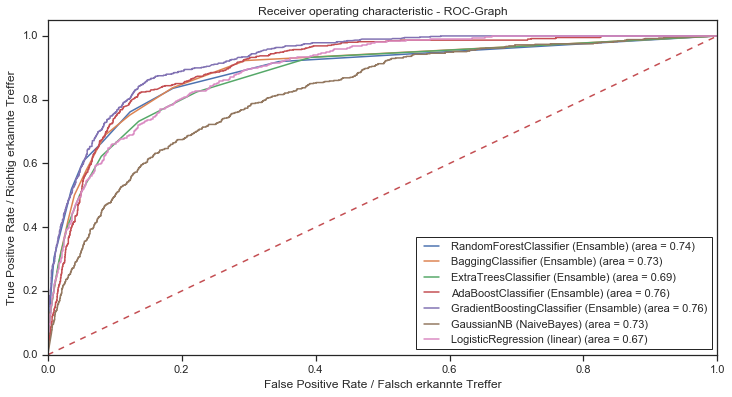

In [54]:
rf_roc_auc_array = []
fpr_array = []
tpr_array = []
thresholds_array = []

plt.figure(figsize=(12,6))
for i in range(len(my_models)):
    rf_roc_auc_array.append(roc_auc_score(y_test, my_models[i].predict(x_test)))
    fpr, tpr, thresholds = roc_curve(y_test, my_models[i].predict_proba(x_test)[:,1])
    fpr_array.append(fpr)
    tpr_array.append(tpr)
    thresholds_array.append(thresholds)
    plt.plot(fpr, tpr, label=my_models_name[i]+' (area = %0.2f)' % rf_roc_auc_array[i])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
plt.title('Receiver operating characteristic - ROC-Graph')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# 3. Optimized-Classificaton
# 3.1 CrossValidation 


https://scikit-learn.org/stable/modules/cross_validation.html

# Reset Data

In [55]:
dfnew = pd.DataFrame(df)
df_data1 = pd.get_dummies(df)
df_data1.columns
le = LabelEncoder()
dfnew['Revenue'] = le.fit_transform(dfnew['Revenue'])
dfnew['Revenue'].value_counts()
# Abhängige und unabhängige Variablen
x = df_data1

# entfernen meines Targets (Umsatz)
x = x.drop(['Revenue'], axis = 1)

y = dfnew['Revenue']

# Dimensionen checken
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 26)
Shape of y: (12330,)


In [56]:

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 123)

X = x
y = y


for i in range(len(my_models)):
    print("CV: "+str(cross_val_score(my_models[i], X, y, cv=6))+" <- "+str(my_models_name[i]))  


CV: [0.90997567 0.91192214 0.87396594 0.80924574 0.87737226 0.87591241] <- RandomForestClassifier (Ensamble)
CV: [0.9163017  0.91435523 0.87250608 0.75231144 0.87347932 0.86520681] <- BaggingClassifier (Ensamble)
CV: [0.86861314 0.89440389 0.85158151 0.72992701 0.88029197 0.85985401] <- ExtraTreesClassifier (Ensamble)
CV: [0.85693431 0.88321168 0.88126521 0.80291971 0.87250608 0.87007299] <- AdaBoostClassifier (Ensamble)
CV: [0.9026764  0.92311436 0.88515815 0.79367397 0.88856448 0.88856448] <- GradientBoostingClassifier (Ensamble)
CV: [0.87250608 0.87396594 0.76107056 0.18832117 0.75279805 0.75815085] <- GaussianNB (NaiveBayes)
CV: [0.88272506 0.88467153 0.87931873 0.78588808 0.87737226 0.86909976] <- LogisticRegression (linear)


In [57]:
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
#scoring = ['precision_macro', 'recall_macro']

scoring = {'prec_macro': 'precision_macro','rec_macro': make_scorer(recall_score, average='macro')}

for i in range(len(my_models)):
    cv_results = cross_validate(my_models[i], X, y, cv=10, scoring=scoring)
    #print(i)
    cv_results.update( {'Modell' : my_models_name[i]} )
    cv_results
    if i == 0:
        dfdict = pd.DataFrame.from_dict(cv_results, orient='columns')
    else:
        dftemp = pd.DataFrame.from_dict(cv_results, orient='columns')
        dfdict = dfdict.append(dftemp)


In [58]:
dfdict.head(7)

fit_time  score_time  test_prec_macro  test_rec_macro  \
0  0.098737    0.007978         0.904009        0.608509   
1  0.096741    0.007979         0.806267        0.722142   
2  0.095745    0.006981         0.904048        0.750786   
3  0.092752    0.006981         0.809415        0.701443   
4  0.095744    0.007979         0.861753        0.735517   
5  0.090757    0.007979         0.754726        0.731289   
6  0.092752    0.008976         0.756864        0.687570   

                              Modell  
0  RandomForestClassifier (Ensamble)  
1  RandomForestClassifier (Ensamble)  
2  RandomForestClassifier (Ensamble)  
3  RandomForestClassifier (Ensamble)  
4  RandomForestClassifier (Ensamble)  
5  RandomForestClassifier (Ensamble)  
6  RandomForestClassifier (Ensamble)

In [59]:
dfdict.sort_values(by=['fit_time'], ascending=True).head(10)

fit_time  score_time  test_prec_macro  test_rec_macro  \
1  0.015957    0.004987         0.676780        0.666021   
4  0.015957    0.004987         0.671756        0.684696   
5  0.015957    0.004987         0.449269        0.425983   
6  0.015957    0.004987         0.520950        0.539749   
0  0.015958    0.004987         0.673736        0.508554   
3  0.015958    0.004986         0.639710        0.628106   
8  0.015958    0.003989         0.662734        0.734433   
7  0.015958    0.004986         0.678509        0.769824   
2  0.015958    0.004986         0.778285        0.709952   
9  0.016955    0.003989         0.649447        0.734620   

                    Modell  
1  GaussianNB (NaiveBayes)  
4  GaussianNB (NaiveBayes)  
5  GaussianNB (NaiveBayes)  
6  GaussianNB (NaiveBayes)  
0  GaussianNB (NaiveBayes)  
3  GaussianNB (NaiveBayes)  
8  GaussianNB (NaiveBayes)  
7  GaussianNB (NaiveBayes)  
2  GaussianNB (NaiveBayes)  
9  GaussianNB (NaiveBayes)

In [60]:
dfdict.sort_values(by=['test_prec_macro','fit_time'], ascending=False).head(10)

fit_time  score_time  test_prec_macro  test_rec_macro  \
2  0.081781    0.007978         0.929229        0.712740   
2  0.741019    0.006981         0.907313        0.811214   
2  0.095745    0.006981         0.904048        0.750786   
0  0.098737    0.007978         0.904009        0.608509   
2  0.882640    0.073802         0.889644        0.618020   
2  0.408907    0.018949         0.888366        0.783597   
0  0.717083    0.005984         0.886676        0.594941   
0  0.181515    0.004986         0.886332        0.554015   
2  0.125664    0.004987         0.870324        0.669635   
4  0.095744    0.007979         0.861753        0.735517   

                                  Modell  
2        ExtraTreesClassifier (Ensamble)  
2  GradientBoostingClassifier (Ensamble)  
2      RandomForestClassifier (Ensamble)  
0      RandomForestClassifier (Ensamble)  
2          AdaBoostClassifier (Ensamble)  
2           BaggingClassifier (Ensamble)  
0  GradientBoostingClassifier (Ensamble)  
0            LogisticRegression (linear)  
2            LogisticRegression (linear)  
4      RandomForestClassifier (Ensamble)

# 3.2 KFold


# Reset Data

In [61]:
dfnew = pd.DataFrame(df)
df_data1 = pd.get_dummies(df)
df_data1.columns
le = LabelEncoder()
dfnew['Revenue'] = le.fit_transform(dfnew['Revenue'])
dfnew['Revenue'].value_counts()
# Abhängige und unabhängige Variablen
x = df_data1

# entfernen meines Targets (Umsatz)
x = x.drop(['Revenue'], axis = 1)

y = dfnew['Revenue']

# Dimensionen checken
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 26)
Shape of y: (12330,)


# Bestes Modell ohne HyperparamterOptimierung

In [62]:

import numpy as np
from sklearn.model_selection import KFold


def best_kfold_fitted_model(model_list,models_name_list,x,y,n_splits):
    xnew = x
    ynew = y
    
    #KFOLD Config
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(xnew)

    #die ganzen score arrays ... koennen ausgeduent werden !!!!
    precision_array = []
    accuracy_array = []
    accuracyBalanced_array = []
    recall_array = []
    TPR_array=[]
    TNR_array = []
    Fmeasure_array = []
    name_array = []
    fold_array = []

    j=0
    #return Values für die rueckgabe
    bestACC = 0.0
    bestF1 = 0.0
    bestPre = 0.0
    bestmodel = 0
    
    for train_index, test_index in kf.split(xnew):
        print("TRAIN:", train_index, "TEST:", test_index)
        kfold_x_train, kfold_x_test = xnew.iloc[train_index], xnew.iloc[test_index]
        kfold_y_train, kfold_y_test = ynew.iloc[train_index], ynew.iloc[test_index]
        for i in range(len(model_list)):
            model_list[i].fit(kfold_x_train, kfold_y_train)
            precision_array.append(precision_score(kfold_y_test, model_list[i].predict(kfold_x_test)))
            accuracy_array.append(accuracy_score(kfold_y_test, model_list[i].predict(kfold_x_test)))
            recall_array.append(recall_score(kfold_y_test, model_list[i].predict(kfold_x_test)))
            TPR_array.append(recall_score(kfold_y_test, model_list[i].predict(kfold_x_test)))
            TNR_array.append((1-(recall_score(kfold_y_test, model_list[i].predict(kfold_x_test)))))
            Fmeasure_array.append(2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i])))
            accuracyBalanced_array.append( (TNR_array[i]+TPR_array[i])/2 )
            name_array.append(models_name_list[i])
            fold_array.append(j)
            tempACC = accuracy_score(kfold_y_test, model_list[i].predict(kfold_x_test))
            tempPre = precision_score(kfold_y_test, model_list[i].predict(kfold_x_test))
            tempF1 = 2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i]))
            print(tempACC)
            if bestACC < tempACC and bestF1 < tempF1 and bestPre < tempPre:
            #if bestACC < tempACC:
                print('erreicht')
                bestACC = tempACC
                bestF1 = tempF1
                bestPre = tempPre
                bestIndex = i

                bestmodel = model_list[i]
        j+=1
    d = {'Model': name_array,
    'Fold Number': fold_array,
    'Precision': precision_array, 
    'Accuracy': accuracy_array, 
    'Balanced Accuracy': accuracyBalanced_array,
    'Recall': recall_array, 
    'TPR': TPR_array, 
    'TNR': TNR_array, 
    'Fmeasure': Fmeasure_array}
    return pd.DataFrame(data=d), [bestIndex,bestmodel,bestACC,bestPre,bestF1]

dataframe_with_scores, bestmodel = best_kfold_fitted_model(my_models,my_models_name,x,y,8)
  

TRAIN: [ 1542  1543  1544 ... 12327 12328 12329] TEST: [   0    1    2 ... 1539 1540 1541]
0.9487678339818417
erreicht
0.9552529182879378
erreicht
0.9396887159533074
0.9461738002594033
0.9552529182879378
0.9221789883268483
0.9364461738002594
TRAIN: [    0     1     2 ... 12327 12328 12329] TEST: [1542 1543 1544 ... 3081 3082 3083]
0.9312581063553826
0.9254215304798963
0.9163424124513618
0.914396887159533
0.9319066147859922
0.8929961089494164
0.9111543450064851
TRAIN: [    0     1     2 ... 12327 12328 12329] TEST: [3084 3085 3086 ... 4622 4623 4624]
0.9370538611291369
0.9409474367293965
0.9377027903958468
0.9234263465282284
0.9467878001297858
0.9072031148604802
0.9318624269954575
TRAIN: [    0     1     2 ... 12327 12328 12329] TEST: [4625 4626 4627 ... 6163 6164 6165]
0.9065541855937703
0.9013627514600908
0.899415963659961
0.8955223880597015
0.9026606099935107
0.7806619078520441
0.8864373783257625
TRAIN: [    0     1     2 ... 12327 12328 12329] TEST: [6166 6167 6168 ... 7704 7705 770

# 3.3 RandomSearch+CrossValidation

In [63]:
my_models = [
    RandomForestClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    #VotingClassifier(estimators=1000),
    GaussianNB(),
    #RidgeClassifier(),
    LogisticRegression()
]

my_models_name = [
    'RandomForestClassifier (Ensamble)',
    'BaggingClassifier (Ensamble)',
    'ExtraTreesClassifier (Ensamble)',
    'AdaBoostClassifier (Ensamble)',
    'GradientBoostingClassifier (Ensamble)',
    'GaussianNB (NaiveBayes)',
    #'RidgeClassifier (linear)',
    'LogisticRegression (linear)'
]

# ParameterGrid anlegen ... für jedes Modell bzw. Paramtervariationen abdecken

In [83]:
cpu_cores = 8
param_dist = [{"max_depth": [1,3,5,7,9,11, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "class_weight": [None],
              "max_leaf_nodes": [None],
              "min_impurity_decrease": [0.0, 0.1, 0.2],
              "min_impurity_split": [None],
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": [50,100,200,500],
              "n_jobs": [cpu_cores],
              "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
              "random_state": [None, 42, 132],
              "warm_start": [True, False]
              },
             {"bootstrap": [True, False],
              "bootstrap_features": [True, False],
              "max_features": [1.0],
              "max_samples": [1.0],
              "n_estimators": [10,50,100,200,500],
              "n_jobs": [cpu_cores],
              "random_state": [None, 42, 132],
              "warm_start": [True, False]
             },
              {"max_depth": [1,3,5,7,9,11, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "class_weight": [None],
              "max_leaf_nodes": [None],
              "min_impurity_decrease": [0.0, 0.1, 0.2],
              "min_impurity_split": [None],
              "min_samples_leaf": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": [50,100,200,500],
              "n_jobs": [cpu_cores],
              "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
              "random_state": [None, 42, 132],
              "warm_start": [True, False]
              },
              {"algorithm": ['SAMME.R', 'SAMME'],
              "learning_rate": [1.0],
              "n_estimators": [10,50,100,200,500],
              "random_state": [None, 42, 132],
              },
              {"criterion": ['friedman_mse', 'mse', 'mae'], #mean absolute error (mae).
              "learning_rate": [0.1],
              "loss": ['deviance', 'exponential'],
              "max_depth": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": [10,20,30],
              "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
              "random_state": [None, 42, 132],
              "warm_start": [True, False],
              "presort": ['auto'],
              "subsample": [1.0],
              "tol": [0.0001],
              "validation_fraction": [0.1]
              },
              {"var_smoothing": [1e-09] 
              },            
              {"C": [1.0, 0.5, 1.1, 0.9],
              "fit_intercept": [True, False],
              "intercept_scaling": sp_randint(1, 11),
              "l1_ratio": [None],
              "max_iter": [100,200,500,1000],
              "multi_class": ['ovr','multinomial','auto'],
              "n_jobs": [cpu_cores],
              "penalty": ['l2'],
              "tol": [0.0001],
              "random_state": [None, 42, 132],
              "warm_start": [True, False],
              "solver": ['lbfgs', 'sag', 'saga'],
              }]

#param_dist[0]['max_depth']
#param_dist

In [84]:
#for i in range(len(my_models)):
#    print(my_models[i])

# Bestes Modell mit HyperparamterOptimierung

In [85]:
print(__doc__)
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import KFold


# SupportMethode die die Scores ausgibt und die besten Paramter zurueck gibt
def get_best_params_and_report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0} Mean validation score: {1:.3f} (std: {2:.3f})".format(i,
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            #print("Parameters: {0}".format(results['params'][candidate]))
            #print("")
            if i == 1:
                bestparams = results['params'][candidate]
                bestscore = {'mean':results['mean_test_score'][candidate],'std': results['std_test_score'][candidate]}
    return bestparams, bestscore
#Stellt das beste Modell bereit

def best_opti_fitted_model(model_list,models_name_list,param_dict_list,x,y,xtest,ytest):
    xnew = x
    ynew = y
    xtest = xtest
    ytest = ytest
    
    #die ganzen score arrays ... koennen ausgeduent werden !!!!
    precision_array = []
    accuracy_array = []
    accuracyBalanced_array = []
    recall_array = []
    TPR_array=[]
    TNR_array = []
    Fmeasure_array = []
    name_array = []
    time_to_optimized_hyperParameters = []
    #return Values für die rueckgabe
    bestACC = 0.0
    bestF1 = 0.0
    bestPre = 0.0
    bestRec = 0.0
    bestmodel = 0
    bestscoreList = []
    bestscoreList2 = []
    #RandomizedHyperparamter
    n_iter_search = 20
   
    
    for i in range(len(model_list)):
        #RandomInitializedModel
        random_search = RandomizedSearchCV(my_models[i], param_distributions=param_dict_list[i],n_iter=n_iter_search, cv=5, iid=False)
        start = time()
        random_search.fit(xnew, ynew)
        time_to_optimized_hyperParameters.append(time() - start)
        print("\n######### "+str(models_name_list[i])+" #########")
        print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % (time_to_optimized_hyperParameters[i], n_iter_search))
        bestparams, bestscore = get_best_params_and_report(random_search.cv_results_)
        bestscoreList.append(bestscore['mean'])
        bestscoreList2.append(bestscore['std'])
        model_list[i] = random_search.best_estimator_
        model_list[i].fit(xnew, ynew)

        #Berechnung der Scores
        precision_array.append(precision_score(ytest, model_list[i].predict(xtest)))
        accuracy_array.append(accuracy_score(ytest, model_list[i].predict(xtest)))
        recall_array.append(recall_score(ytest, model_list[i].predict(xtest)))
        TPR_array.append(recall_score(ytest, model_list[i].predict(xtest)))
        TNR_array.append((1-(recall_score(ytest, model_list[i].predict(xtest)))))
        Fmeasure_array.append(2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i])))
        accuracyBalanced_array.append( (TNR_array[i]+TPR_array[i])/2 )
        name_array.append(models_name_list[i])
       
        #Selektion Section
        tempACC = accuracy_score(ytest, model_list[i].predict(xtest))
        tempPre = precision_score(ytest, model_list[i].predict(xtest))
        tempF1 = 2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i]))
        tempRec = recall_score(ytest, model_list[i].predict(xtest))
        print(tempACC)
        if bestF1 < tempF1 and bestPre < tempPre and bestRec < tempRec:
        #if bestACC < tempACC:
            print('########  Treffer -> Save -> '+str(name_array[i])+' ########')
            bestACC = tempACC
            bestF1 = tempF1
            bestPre = tempPre
            bestRec = tempRec
            bestIndex = i

            bestmodel = model_list[i]
    d = {'Model': name_array,
    'Precision': precision_array, 
    'Accuracy': accuracy_array, 
    'Balanced Accuracy': accuracyBalanced_array,
    'Recall': recall_array, 
    'TPR': TPR_array, 
    'TNR': TNR_array, 
    'Fmeasure': Fmeasure_array,
    'Opti_MeanValidationScore': bestscoreList,
    'Opti_StdScore': bestscoreList2,
    'Opti_TimeToHyP': time_to_optimized_hyperParameters}
    return pd.DataFrame(data=d), [bestIndex,bestmodel,bestACC,bestPre,bestF1]



Automatically created module for IPython interactive environment


### Reset Data

In [86]:
dfnew = pd.DataFrame(df)
df_data1 = pd.get_dummies(df)
df_data1.columns
le = LabelEncoder()
dfnew['Revenue'] = le.fit_transform(dfnew['Revenue'])
dfnew['Revenue'].value_counts()
# Abhängige und unabhängige Variablen
x = df_data1

# entfernen meines Targets (Umsatz)
x = x.drop(['Revenue'], axis = 1)

y = dfnew['Revenue']

# Dimensionen checken
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 26)
Shape of y: (12330,)


### Funktionsweise

1. Initialisiert die nötigen Variablen/Container
2. Läuft eine Variationskette von möglichen Modellen durch. ! Für jedes Modell
3. Fittet das beste Modell in die Modellliste
4. Gibt das beste Modell sowie ein DataFrame mit allen nötien Messwerten zurück
### Auswahlkriterium
Die Selektion findet aufgrund der Bedingung statt, dass das Modell mit dem größten Messungen aus F1, Precision und Recall gewählt wird

In [87]:
xnew_train, xnew_test, ynew_train, ynew_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
print(xnew_train.shape)
print(xnew_test.shape)
print(ynew_train.shape)
print(ynew_test.shape)

(9864, 26)
(2466, 26)
(9864,)
(2466,)


In [88]:
#Mehtode wird ausgeführt ... kann dauern
dataframe_with_scores, bestmodel = best_opti_fitted_model(my_models,my_models_name,param_dist,xnew_train,ynew_train,xnew_test,ynew_test)


######### RandomForestClassifier (Ensamble) #########
RandomizedSearchCV took 36.18 seconds for 20 candidates parameter settings.
Model with rank: 1 Mean validation score: 0.909 (std: 0.005)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank: 2 Mean validation score: 0.847 (std: 0.000)
Model with rank

# 3.3.1 BestScoredModel

In [89]:
bestmodel

[0,
 RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                        max_depth=None, max_features=7, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=9, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=8,
                        oob_score=False, random_state=132, verbose=0,
                        warm_start=True),
 0.8913219789132197,
 0.707395498392283,
 0.6214689265536724]

# 3.3.2 ScoredModelList

In [105]:
dataframe_with_scores.head(10)

Model  Precision  Accuracy  \
0      RandomForestClassifier (Ensamble)   0.707395  0.891322   
1           BaggingClassifier (Ensamble)   0.697531  0.890916   
2        ExtraTreesClassifier (Ensamble)   0.862319  0.879562   
3          AdaBoostClassifier (Ensamble)   0.659942  0.884023   
4  GradientBoostingClassifier (Ensamble)   0.757576  0.894161   
5                GaussianNB (NaiveBayes)   0.430052  0.806164   
6            LogisticRegression (linear)   0.741294  0.878345   

   Balanced Accuracy    Recall       TPR       TNR  Fmeasure  \
0                0.5  0.554156  0.554156  0.445844  0.621469   
1                0.5  0.569270  0.569270  0.430730  0.626907   
2                0.5  0.299748  0.299748  0.700252  0.444860   
3                0.5  0.576826  0.576826  0.423174  0.615591   
4                0.5  0.503778  0.503778  0.496222  0.605144   
5                0.5  0.627204  0.627204  0.372796  0.510246   
6                0.5  0.375315  0.375315  0.624685  0.498328   

   Opti_MeanValidationScore  Opti_StdScore  Opti_TimeToHyP  
0                  0.908758       0.004691       36.184243  
1                  0.905109       0.006801      131.098444  
2                  0.880880       0.002466       34.324217  
3                  0.895378       0.005171      229.074666  
4                  0.907745       0.004395      853.200898  
5                  0.808495       0.010319        0.092752  
6                  0.886050       0.001544      122.762733

# 3.3.3 Sorted ScoredModelList

In [91]:
dataframe_with_scores.sort_values(by=['Precision','Fmeasure','Accuracy'], ascending=False).head(10)

Model  Precision  Accuracy  \
2        ExtraTreesClassifier (Ensamble)   0.862319  0.879562   
4  GradientBoostingClassifier (Ensamble)   0.757576  0.894161   
6            LogisticRegression (linear)   0.741294  0.878345   
0      RandomForestClassifier (Ensamble)   0.707395  0.891322   
1           BaggingClassifier (Ensamble)   0.697531  0.890916   
3          AdaBoostClassifier (Ensamble)   0.659942  0.884023   
5                GaussianNB (NaiveBayes)   0.430052  0.806164   

   Balanced Accuracy    Recall       TPR       TNR  Fmeasure  \
2                0.5  0.299748  0.299748  0.700252  0.444860   
4                0.5  0.503778  0.503778  0.496222  0.605144   
6                0.5  0.375315  0.375315  0.624685  0.498328   
0                0.5  0.554156  0.554156  0.445844  0.621469   
1                0.5  0.569270  0.569270  0.430730  0.626907   
3                0.5  0.576826  0.576826  0.423174  0.615591   
5                0.5  0.627204  0.627204  0.372796  0.510246   

   Opti_MeanValidationScore  Opti_StdScore  Opti_TimeToHyP  
2                  0.880880       0.002466       34.324217  
4                  0.907745       0.004395      853.200898  
6                  0.886050       0.001544      122.762733  
0                  0.908758       0.004691       36.184243  
1                  0.905109       0.006801      131.098444  
3                  0.895378       0.005171      229.074666  
5                  0.808495       0.010319        0.092752

In [92]:
dataframe_with_scores.sort_values(by=['Precision','Fmeasure','Accuracy'], ascending=False).iloc[0:4]

Model  Precision  Accuracy  \
2        ExtraTreesClassifier (Ensamble)   0.862319  0.879562   
4  GradientBoostingClassifier (Ensamble)   0.757576  0.894161   
6            LogisticRegression (linear)   0.741294  0.878345   
0      RandomForestClassifier (Ensamble)   0.707395  0.891322   

   Balanced Accuracy    Recall       TPR       TNR  Fmeasure  \
2                0.5  0.299748  0.299748  0.700252  0.444860   
4                0.5  0.503778  0.503778  0.496222  0.605144   
6                0.5  0.375315  0.375315  0.624685  0.498328   
0                0.5  0.554156  0.554156  0.445844  0.621469   

   Opti_MeanValidationScore  Opti_StdScore  Opti_TimeToHyP  
2                  0.880880       0.002466       34.324217  
4                  0.907745       0.004395      853.200898  
6                  0.886050       0.001544      122.762733  
0                  0.908758       0.004691       36.184243

In [93]:
dataframe_with_scores.sort_values(by=['Fmeasure'], ascending=False).iloc[0:10]

Model  Precision  Accuracy  \
1           BaggingClassifier (Ensamble)   0.697531  0.890916   
0      RandomForestClassifier (Ensamble)   0.707395  0.891322   
3          AdaBoostClassifier (Ensamble)   0.659942  0.884023   
4  GradientBoostingClassifier (Ensamble)   0.757576  0.894161   
5                GaussianNB (NaiveBayes)   0.430052  0.806164   
6            LogisticRegression (linear)   0.741294  0.878345   
2        ExtraTreesClassifier (Ensamble)   0.862319  0.879562   

   Balanced Accuracy    Recall       TPR       TNR  Fmeasure  \
1                0.5  0.569270  0.569270  0.430730  0.626907   
0                0.5  0.554156  0.554156  0.445844  0.621469   
3                0.5  0.576826  0.576826  0.423174  0.615591   
4                0.5  0.503778  0.503778  0.496222  0.605144   
5                0.5  0.627204  0.627204  0.372796  0.510246   
6                0.5  0.375315  0.375315  0.624685  0.498328   
2                0.5  0.299748  0.299748  0.700252  0.444860   

   Opti_MeanValidationScore  Opti_StdScore  Opti_TimeToHyP  
1                  0.905109       0.006801      131.098444  
0                  0.908758       0.004691       36.184243  
3                  0.895378       0.005171      229.074666  
4                  0.907745       0.004395      853.200898  
5                  0.808495       0.010319        0.092752  
6                  0.886050       0.001544      122.762733  
2                  0.880880       0.002466       34.324217

# 3.3.4 Performance Visualitation

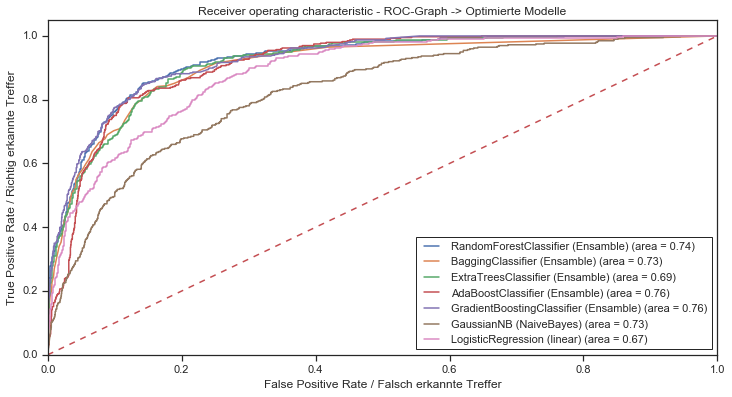

In [94]:
plt.figure(figsize=(12,6))
for i in range(len(my_models)):
    rf_roc_auc_array.append(roc_auc_score(ynew_test, my_models[i].predict(xnew_test)))
    fpr, tpr, thresholds = roc_curve(ynew_test, my_models[i].predict_proba(xnew_test)[:,1])
    fpr_array.append(fpr)
    tpr_array.append(tpr)
    thresholds_array.append(thresholds)
    plt.plot(fpr, tpr, label=my_models_name[i]+' (area = %0.2f)' % rf_roc_auc_array[i])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
plt.title('Receiver operating characteristic - ROC-Graph -> Optimierte Modelle')
plt.legend(loc="lower right")
plt.savefig('RF_ROC_opti3')
plt.show()

<table>
  <thead>
    <tr>
      <th>Standard ModelConfig</th>
      <th>Optimized ModelConfig</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><img src="RF_ROC.png" alt="RF_ROC-StandardModels" title="" /></td>
      <td><img src="RF_ROC_opti3.png" alt="RF_ROC-OptiModels" title="" /></td>
    </tr>
  </tbody>
</table>

# 3.4 ModelExplanation

## Modell Erklärbarkeit präsentieren!! [RandomForest]

**SHAP** (**SH**apley **A**dditive ex**P**lanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods [1-7] and representing the only possible consistent and locally accurate additive feature attribution method based on expectations (see our papers for details and citations).

**SHAP** (**SH**apley **A**dditive ex**P**lanations) ist ein einheitlicher Ansatz, um die Ergebnisse eines jeden maschinellen Lernmodells zu erklären. SHAP verbindet Spieltheorie mit lokalen Erklärungen, vereint mehrere frühere Methoden[1-7] und stellt die einzig mögliche konsistente und lokal genaue Methode zur Attributierung von additiven Merkmalen basierend auf Erwartungen dar (siehe unsere Papiere für Details und Zitate).

Quelle: https://github.com/slundberg/shap

***Abbildung der einzelnen Monate durch den LabelEncounter möglich bzw. OneHotEncoding***

Funktionsweise SHAP: 
* Agnostisches vorgehen (BlackBox)
* sklearn_importance .. whiteBox (performanter)

# 3.4.1 Important Features (TreeExplainer)

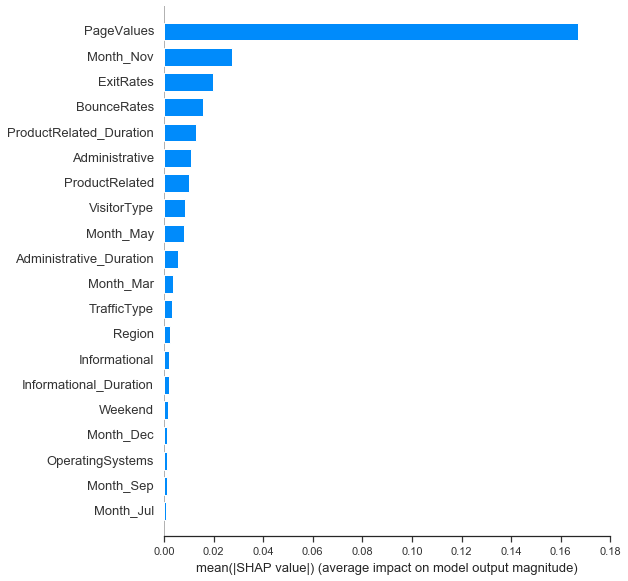

In [95]:
#RandomForest
# let's take a look at the shap values

# importing shap
import shap

explainer = shap.TreeExplainer(my_models[0])
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type = 'bar')

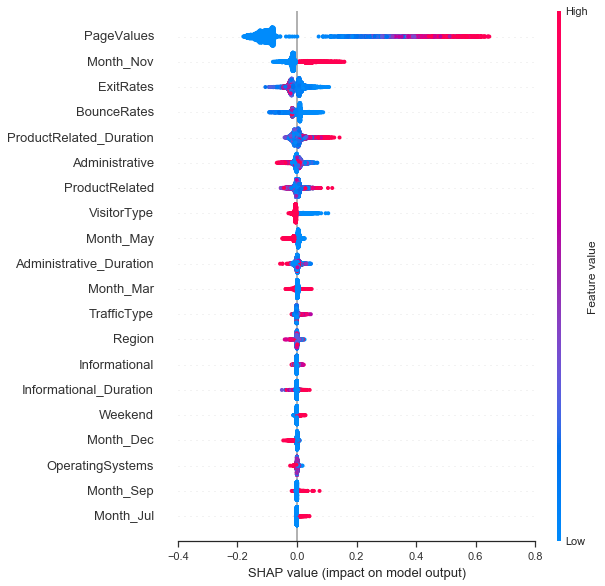

In [96]:
shap.summary_plot(shap_values[1], x_test)

# 3.4.2 Interactive Important Features over Time/Series

In [98]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])


In [99]:
#shap.TreeExplainer(my_models[0]).shap_interaction_values(x_test)

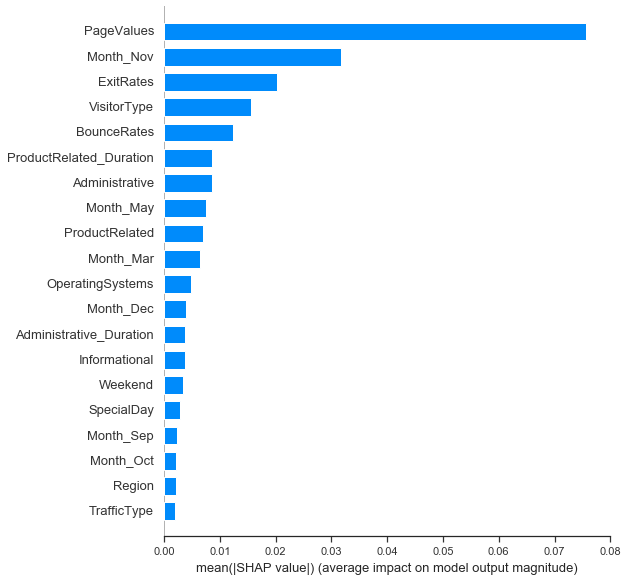

In [100]:
#ExtraTree
explainer = shap.TreeExplainer(my_models[2])
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type = 'bar')

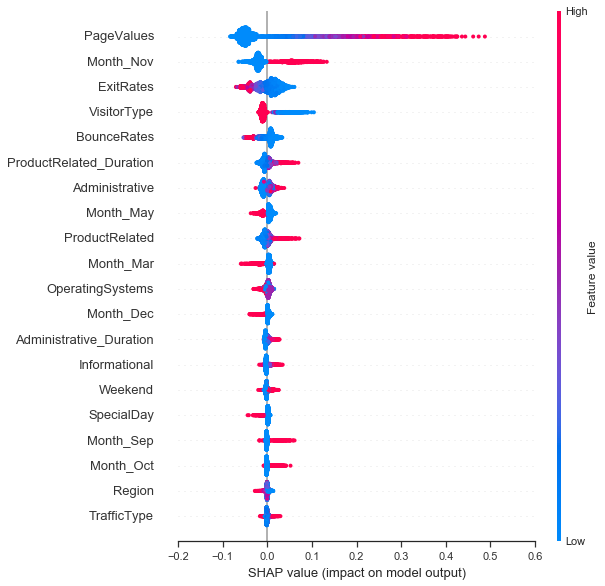

In [101]:
shap.summary_plot(shap_values[1], x_test)

In [102]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])


In [103]:
#shap.TreeExplainer(my_models[2]).shap_interaction_values(x_test)

# 4. Clustering
# 4.1 Feature Selection (Adminitrativen Duration vs BounceRate)


In [109]:
df_data1.head(2)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                      0.0   
1                     0.0               2                     64.0   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Aug  Month_Dec  \
0          0.2        0.2         0.0         0.0  ...          0          0   
1          0.0        0.1         0.0         0.0  ...          0          0   

   Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  \
0          1          0           0          0          0          0   
1          1          0           0          0          0          0   

   Month_Oct  Month_Sep  
0          0          0  
1          0          0  

[2 rows x 27 columns]

# 4.1.1 Feature Selection

In [120]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# Vorbereitung zum Clustern der Adminitrativen Duration und der BounceRate
x = df.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape



(12330, 2)

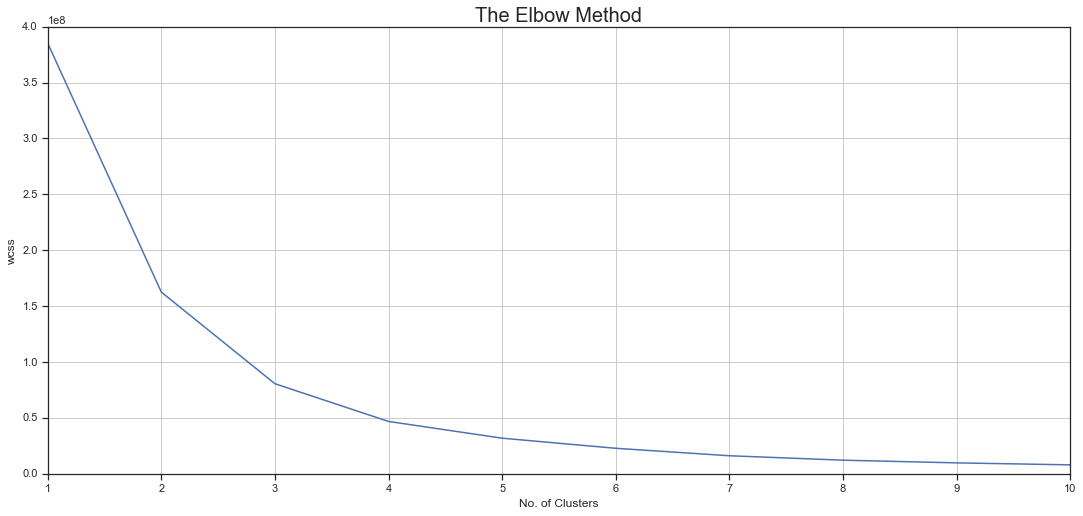

In [121]:
from sklearn.cluster import KMeans
#Maximale Distant zwischen den Clustern
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 600,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

## Umsetzung der Erkenntnisse zur Visualisierung des Adminsitrativen vs BounceRate

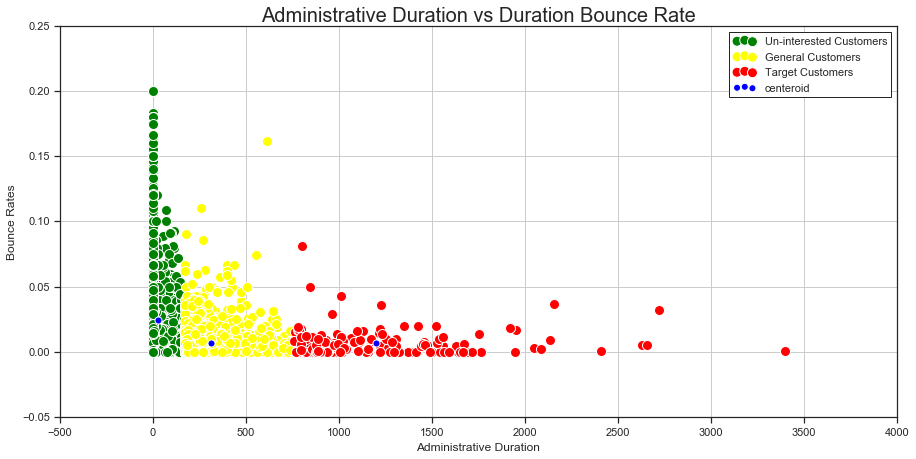

In [122]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'red', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

# 5. Zusammenfassung

* Es sollte der Aufwand einer ParamterOptimierung bewertet werden.
    * wenige Prozentsteigerungen .. zu den BasisModellierungen
* Eine Modellauswahl ist für den Anwednungsfall bereits getroffen
    * Ensamble Modelle  mit Basis DecissionTree
* Es kann geclustert werden
    * hier sind verschiedene Cluster möglich
    * sensibel abstimmen mittels ElbowMethode und dann die effektivste ClusterGröße wählen
* Schwierig zu automatisieren
    * war der Zeit aufwendigste Part
        * Deployment nach CRISP-DM möglich
        * Modellifecycle kann implementiert werden

<img src="CRISP-DM.png" alt="RF_ROC-StandardModels" title="" />

# 9. TEST SECTION

## HYPERPARAMTER OPTIMIERUNG

## GRIDSEARCH

In [ ]:

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
grid = GridSearchCV(estimator=model,
        param_grid={
            'max_depth': [3, None],
            'n_estimators': (10, 30, 50, 100, 200),# 400, 600, 800, 1000),
            'max_features': (2,4,6)
        }, 
        cv=10, n_jobs=-1,)


grid.fit(x_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
#print(grid.best_estimator_.alpha)

## RANDOMSEARCH

https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV

# Reset Data

In [ ]:
dfnew = pd.DataFrame(df)
df_data1 = pd.get_dummies(df)
df_data1.columns
le = LabelEncoder()
dfnew['Revenue'] = le.fit_transform(dfnew['Revenue'])
dfnew['Revenue'].value_counts()
# Abhängige und unabhängige Variablen
x = df_data1

# entfernen meines Targets (Umsatz)
x = x.drop(['Revenue'], axis = 1)

y = dfnew['Revenue']

# Dimensionen checken
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

In [ ]:
# SupportMethode die die Scores ausgibt und die besten Paramter zurueck gibt
def get_best_params_and_report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            if i == 1:
                bestparams = results['params'][candidate]
                bestscore = {'mean':results['mean_test_score'][candidate],'std': results['std_test_score'][candidate]}
    return bestparams, bestscore
#Stellt das beste Modell bereit

n_iter_search = 20
  
random_search = RandomizedSearchCV(my_models[0], param_distributions=param_dist[0],n_iter=n_iter_search, cv=5, iid=False)
random_search.fit(x, y)
start = time()

print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))
bestparams, bestscore = get_best_params_and_report(random_search.cv_results_)



In [ ]:
print(bestparams['bootstrap'])
bestparams
random_search.best_estimator_

In [ ]:
bestscore

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
from sklearn.cluster import dbscan